# TMA4320 Teknisk Fysikk prosjekt

___Innledning___

På 1620-tallet var det flere krigshandlinger rundt om i Europa, blant annet var Sverige i krig med Polen. Med bakgrunn i dette ønsket den svenske kongen å styrke Sverige sin posisjon i Østensjøområdet. Resultatet ble det svenske krigsskipet Vasa. Dessverre for svenskene sank skipet kun 1 km inn i dens første tur (Wisting, 2020). Årsaken til at skipet sank var at skipet hadde dårlig stabilitet, noe som også har medført mange andre ulykker til sjøs. Langs den norsk kysten kantrer omtrent 5 - 10 skip årlig (Holm, 2011). Skipets stabilitet vil påvirkes av en rekke faktorer, eksempelvis bølger, vind, fordeling av last og friksjonkreftene som virker mellom vann og skrog. Disse faktorene vil vi her studere vha. en enkel skipsmodell. Modellen vi vil studere er illustert under: 

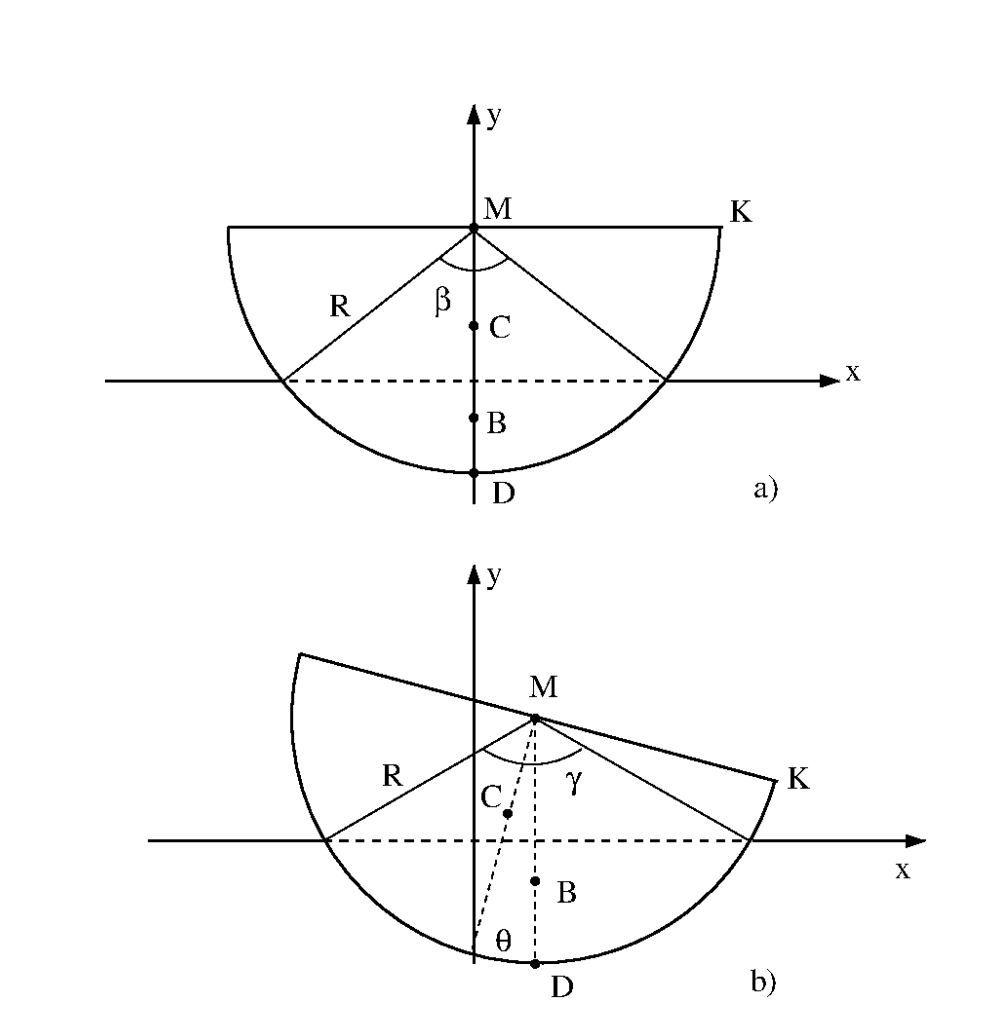

__Figure 1:__ Skipsmodellens geometri.
a) Viser skipet i likevekt
b) Viser skipet etter rotasjon om en vinkel $\theta$ om C og translasjon av C. Rotasjonsvinkelen velges positiv mot klokka, slik at $\theta < 0$ i figuren. Punktene markert på figuren er:
M: metasenter og dekkets midtpunkt;
C: tyngdepunkt;
B: oppdriftsenter;
D: skipets dypeste punkt;
K: skipets kant og dekkets laveste punkt.


In [63]:
# Importer nyttige biblioteker
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

In [2]:
#Konstanter
sigma_0 = 1000   #massetettheten til vann per lengdeenhet i kg/m^2
sigma = 500   #massetetthet til skipet per lengdeenhet i kg/m^2
g = 9.81 #tyngdeakselerasjon i m/s^2
R = 10   #skipets radius
A_s = 1/2*np.pi*R**2  #skipets tverrsnitt
m = A_s*sigma  #skipets masse per lengdeenhet
I_C = 1/2*m*R**2*(1-32/(9*np.pi**2))  #skipets treghetsmoment med hensyn på aksen gjennom tyngdepunktet C
h = 4*R/(3*np.pi)   #høydeforskjellen mellom metasenteret og massesenteret
A_0 = (sigma*np.pi*R**2)/(2*sigma_0) #skipets tverrsnitt under overflaten for kompakt skip

In [3]:
#Fikspunktfunksjon
def fixedpoint(g, x0, tol=1.e-8, max_iter=30):
    ''' Solve x=g(x) by fixed point iterations
        The output of each iteration is printed
    Input:
        g:   The function g(x)
        x0:  Initial values
        tol: The tolerance
    Output:
        The root and the number of iterations
    '''
    x = x0                               # Setter den første verdien lik x, bruker dette for å starte iterasjonene
    #print(f"k ={0:3d}, x = {x:14.10f}")  # Printer antall iterasjoner og tilhørende x verdi
    
    # Itererer til feilen (diffransen mellom to målinger) er mindre enn en toleranse, eller maxiterasjoner er oppnådd
    for k in range(max_iter):            
        x_old = x                        # Lagrer den gamle verdien, da denne skal brukes for å estimere feil
        x = g(x)                         # Finner verdien til funksjonen ved en gitt den forrige verdien
        err = abs(x-x_old)               # Finner et feilestimat, differanse mellom to x verdier som kommer etter hverandre
        #print(f"k ={k+1:3d}, x = {x:14.10f}") # Printer antall iterasjoner og tilhørende x verdi
        if err < tol:                    # Sjekker om feilen er mindre enn en gitt toleranse
            break
    return x, k+1

Når båten befinner seg i likevekt kan man finne $\beta$ vha. likningen under. $\beta$ vil beskrive hvor stor del av skipet som er i kontakt med vannet.
$$ \beta -sin(\beta) = \frac{\pi\sigma}{\sigma_{0}} \implies \beta = \frac{\pi\sigma}{\sigma_{0}}+sin(\beta)$$

Ved hjelp av denne likningen lager vi en funksjon f som beskriver den høyre siden av likningen. Under er et plott for funksjonen $f_{\beta}$ og $\beta$. Skjæringspunktet mellom dem vil være løsningen på likingen $ \beta -sin(\beta) = \frac{\pi\sigma}{\sigma_{0}}$ og dermed fortelle oss hvor stor del av skipet som er i kontakt med vannflaten ved likevekt.

In [4]:
def f_beta(beta):
    return (np.pi*sigma)/(sigma_0) + np.sin(beta)

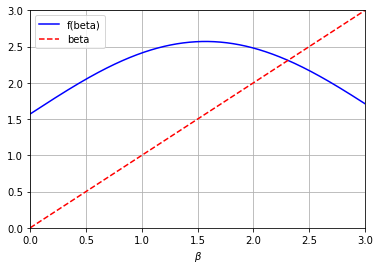

In [5]:
x_vals = np.linspace(0, 3, 1001) # Velger n verdier mellom start og slutt, her n = 1001, start = 0 
plt.plot(x_vals, f_beta(x_vals) ,'b', x_vals, x_vals, '--r' ) # Plotter begge funksjonene i samme plot som funksjon av beta (her x)
plt.axis([0, 3, 0, 3]) #Setter grenser for hvoræ vi plotter
plt.xlabel(r'$\beta$')
plt.grid('True')
plt.legend(['f(beta)','beta']);

Plottet over viser grafene til $f_{\beta}$ og $\beta$, som nevnt over vil skjæringspunktet mellom disse være løsningen for likningen definert over. Ved hjelp av plottet over ser vi at skjæringspunktet ligger mellom 2 og 2,5. Denne informasjonen kan vi bruke til å finne et passende startpunkt. Vi velger dermed å sette startverdien vår lik 2,25. Vi benytter oss av fikspunkt iterasjon (se kode i kodeblokk Fikspunktfunksjon) sammen med funksjonen $f_{\beta}$ og startpunktet til å løse likningen. Vi valgte en toleranse på $10^{-6}$, da denne gir oss en god feilmargin og ingen betydelig differanse i kjøretid sammenlignet med større alternativer. Maks antall iterasjoner er satt til 35. Ved hjelp av fikspunkt iterasjoner får vi at $\beta = 2,31 $ (svaret er oppgitt i radianer) (Se kodeblokk under)

In [6]:
beta, iterasjoner = fixedpoint(f_beta, x0=2.25, tol=1.e-6, max_iter=35)
if iterasjoner == 35:
    print("Maksimalt antall iterasjoner oppnådd")

print("Iterasjoner: ", iterasjoner , ", beta: ", beta )

Iterasjoner:  31 , beta:  2.309881740709917


Konstantene definert under beskriver y-koordinatene til ulike punkter av skipet, med y = 0 ved vannets overflate. Disse konstantene vil være gyldige så lenge skipet ikke har last. Vi vil se bort fra last inntil annet spesifiseres. 

In [7]:
# Beregner høyde over vannlinj for variablene gitt at vannhøyden er ved y = 0
y_M0 = R*np.cos(beta/2)      #Høyden til Metasenteret
y_C0 = y_M0 - h              #Høyden til Massesenteret
y_B0 = y_M0 - (4*R*np.sin(beta/2)**3)/(3*(beta-np.sin(beta))) # Høyden til oppdriftkraftensangrepspunkt
y_D0 = y_M0 - R              #Høyden til det dypeste punktet 

print("Høyden over vannlinja (y = 0) for metasenteret er: ",round(y_M0,3) )
print("Høyden over vannlinja (y = 0) for massesenteret er: ",round(y_C0,3) )
print("Høyden over vannlinja (y = 0) for oppdriftkraftensangrepspunkt er: ",round(y_B0,3) )
print("Høyden over vannlinja (y = 0) for det dypeste punktet er: ",round(y_D0,3) )

Høyden over vannlinja (y = 0) for metasenteret er:  4.04
Høyden over vannlinja (y = 0) for massesenteret er:  -0.204
Høyden over vannlinja (y = 0) for oppdriftkraftensangrepspunkt er:  -2.458
Høyden over vannlinja (y = 0) for det dypeste punktet er:  -5.96


Vi vil her neglisjere bevegelse av massesenteret, og dermed kan hele skipets dynamikk representeres av likningen under.
Inntil annet spesifiseres vil vi neglisjere alle krefter/dreiemomenter utenom de beskrevet i likningene under:

$$F_{G} = -mg, \quad F_{B} = A\sigma_{0}g, \quad \tau_{B} = -F_{B}h\cdot sin(\theta)$$

I tillegg antar vi at den fortrengte mengden vann ikke endrer seg som ettersom skipet beveger seg. Dette impliserer at $ |F_{G}| = |F_{B}| $, dermed er det kun dreiemomentet $\tau_{B}$ som bidrar til forflyttelse av skipet. 

Vi introduserer vektoren $\vec{w} = [\theta(t) \quad \omega(t)]^{T}$, hvor $\omega = \frac{d\theta}{dt}$. Her vil $\theta = w[0]$ og $\omega = w[1]$. Ved derivasjon av denne vektoren får vi:
$$\frac{d\vec{w}}{dt} = [\frac{d\theta}{dt} \quad \frac{d\omega}{dt}]^{T} = [\frac{d\theta}{dt} \quad \frac{d^2\theta}{dt^2}]^{T} =[\omega \quad \frac{d\omega}{dt}]^{T} $$


La oss ta utgangspunkt i i formelen $\sum \tau = I_{c}\frac{d\omega}{dt}$. Ettersom det eneste dreiemomentet som virker på båten er $\tau_{B}$ får vi: 

$$\sum \tau = -F_{B}h\cdot sin(\theta) = - A\sigma_{0}gh\cdot sin(\theta)=  -mgh\cdot sin(\theta)$$

$$\implies -mgh\cdot sin(\theta) = I_{c}\frac{d\omega}{dt} \implies  \frac{d\omega}{dt} = \frac{-mgh\cdot sin(\theta) }{I_{c}} $$


Denne verdien kan settes inn i $\frac{d\vec{w}}{dt}$ får vi: 

$$\frac{d\vec{w}}{dt}= [\omega \quad \frac{-mgh\cdot sin(\theta) }{I_{c}}]^{T} = [w[1] \quad \frac{-mgh\cdot sin(w[0]) }{I_{c}}]^{T} = \vec{f}(t,\vec{w}) $$

Dermed kan det konkluderes med at $\frac{d\vec{w}}{dt}= \vec{f}(t,\vec{w}) $, hvor $\vec{f}(t,\vec{w}) = [\omega \quad \frac{-mgh\cdot sin(\theta) }{I_{c}}]^{T}$


Vi ønsker nå å finne verdier av $\theta$ og $\omega$ som funksjon av tid. Dette gjør vi ved å benytte oss av Eulersmetode på det koblede systemet av ODE-er beskrevet over. Eulersmetode er implementert under. 
Initialverdiene vi velger å benytte oss av er: $\theta (0) = 20 ^{\circ}$ og $\omega(0)= 0$

In [8]:
def f_vec(t, w):
    return np.array([w[1], -m*g*h/I_C* np.sin(w[0])]) # Funksjonen utledet over

In [9]:
def euler(funksjon, t, w, steglengde):
    # Et steg i eulermetoden
    w_next = w + np.multiply(steglengde,funksjon(t, w)) # Finner den neste y verdien
    t_next = t + steglengde                      # Finner den neste x verdien
    return t_next, w_next
# euler slutt


In [10]:
def ode_solver(funksjon, t0, tend, w0, steg, method):
    '''
    f: funksjon som skal løses
    t0, tend: start og slutt tid
    w0: startverdier til w 
    steg: steglengde
    method: metode for løsning'''
    
    n = round((tend-t0)/steg + 0.5) #antall steg, plusser på 0.5 for å alltid runde opp hvis ikke nøyaktig. Bruker dette til å fylle opp lister ved eventuell kantring
    
    w_num = np.zeros((n,len(w0))) #lager en tom liste for w-verdier av lengde n
    t_num = np.linspace(t0, tend, n)  #lager en liste med t verdier

    #ny_steglengde = t_num[1]-t_num[0] 

    tn = t0                # definerer startverdiene til tn og wn
    wn = w0

    #kjører valgt metode for alle t-verdier
    for i in range(n):
        tn, wn = method(funksjon, tn, wn, steg)    #et steg med valgt metode
                
        w_num[i] = wn  #legger til w i listen over w-verdier
    
    if tend != tn:
        siste_steg = tend - tn
        tn, wn = method(funksjon, tn, wn, siste_steg)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        w_num = np.concatenate((w_num, np.array([wn])))
        t_num = np.append(t_num,tn) 
    
    return t_num, w_num


In [11]:
# Setter startverdier
theta_0 = (20/180)*np.pi # Utgangsvinkel
omega_0 = 0              # Utgangsvinkelhastighet

w_0 = np.array([theta_0, omega_0]) # Vektor med startverdiene

Text(0, 0.5, '$\\theta$ [rad]')

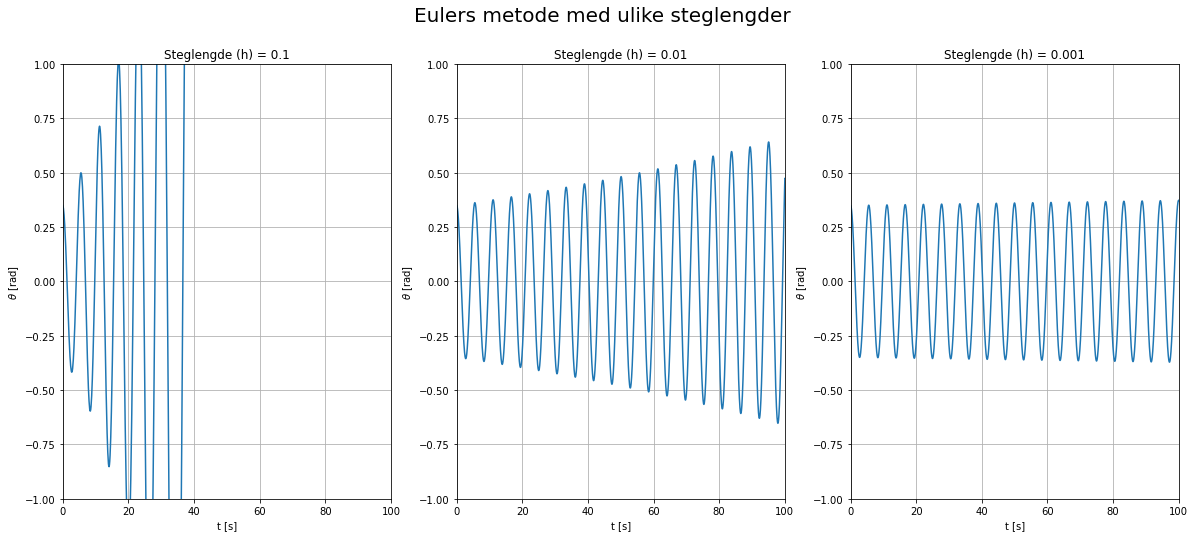

In [12]:
#Kjører Euler for 3 ulike steglengde for å sjekke hvilke steglengde som er mest hensiktsmessig
x_num_steglengde1, y_num_steglengde1 = ode_solver(f_vec, 0, 100, w_0, 0.1, method=euler)
x_num_steglengde2, y_num_steglengde2 = ode_solver(f_vec, 0, 100, w_0, 0.01, method=euler)
x_num_steglengde3, y_num_steglengde3 = ode_solver(f_vec, 0, 100, w_0, 0.001, method=euler)

# Plotter Euler metoden for de 3 ulike steglengdene    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.suptitle('Eulers metode med ulike steglengder',size=20)

axes[0].plot(x_num_steglengde1, y_num_steglengde1[:,0])
axes[0].set_title("Steglengde (h) = 0.1")
axes[0].axis([0, 100, -1, 1])
axes[0].grid()
axes[0].set_xlabel('t [s]')
axes[0].set_ylabel(r'$\theta$ [rad]')

axes[1].plot(x_num_steglengde2, y_num_steglengde2[:,0])
axes[1].set_title("Steglengde (h) = 0.01")
axes[1].axis([0, 100, -1, 1])
axes[1].grid()
axes[1].set_xlabel('t [s]')
axes[1].set_ylabel(r'$\theta$ [rad]')

axes[2].plot(x_num_steglengde3, y_num_steglengde3[:,0])
axes[2].set_title("Steglengde (h) = 0.001")
axes[2].axis([0, 100, -1, 1])
axes[2].grid()
axes[2].set_xlabel('t [s]')
axes[2].set_ylabel(r'$\theta$ [rad]')


Over har vi plottet $\theta$ (utslagsvinkelen) som en funksjon av t (tiden) for ulike steglengder. På den første grafen klarer ikke steglengden å holde på de harmoniske svingningene. Når det gjelder det andre plottet, holder denne bedre på den harmoniske oscilleringen enn den første grafen. Allikevel kan man se at når t blir stor vil amplitudene øke noe. Den siste grafen har ikke et synlig avvik fra en harmonsik oscillering. Amplitudene holdes konstant(det er ikke mulig å se endringer i amplitude på øyemål). Kjøretiden blir lengre for den minkende steglengde, men kjøretiden er ikke så lang at det blir et problem. Dermed velger vi å bruke en steglengde på 0.001 

Text(0, 0.5, '$\\theta$ [rad]')

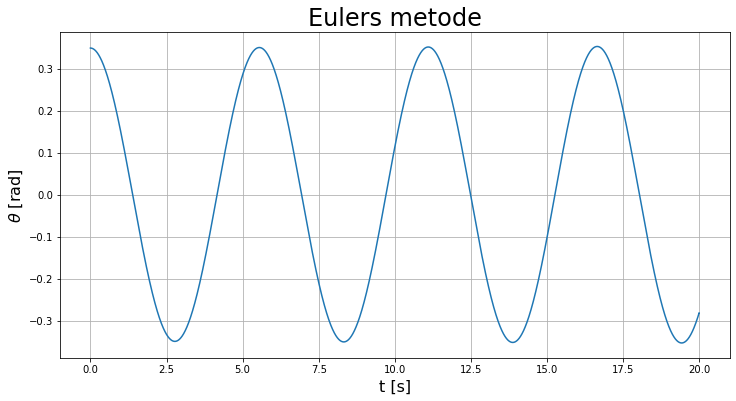

In [13]:
steglengde = 0.001

t0, tend = 0, 20         # Start og sluttverdi for t

t_vals, vales = ode_solver(f_vec, t0, tend, w_0, steglengde, method=euler)

plt.figure(figsize=(12, 6))
plt.plot(t_vals, vales[:,0])
plt.grid()
plt.title("Eulers metode", size = 24)

plt.xlabel('t [s]', size = 16)
plt.ylabel(r'$\theta$ [rad]', size = 16)

For små verdier av $\theta$ er det vanlig å benytte seg av småvinkelapproksimasjon, $sin(\theta) \approx \theta$. Vi vil her studere hvor god denne tilnærmingen er ved ulike startvinkler, ved å sammenligne startvinkler på $20^{\circ}$ og $1^{\circ}$. Av småvinkelapproksimasjonen følger $\tau_{B} = -F_{B}h\theta$.

$$\sum \tau = \tau_{B} = \tau_{B} = -F_{B}h\theta = -mgh\theta \quad \text{og} \quad \sum \tau = I_{C}\frac{d\omega}{dt}=I_{C}\frac{d^2\theta}{dt^2} = I_{C}\ddot{\theta}$$
$$ \implies -mgh\theta = I_{C}\ddot{\theta} \implies \ddot{\theta} = \frac{-mgh\theta}{I_{C}} $$

Fra tidligere vet vi at: 

$$\frac{d\vec{w}}{dt} = [\frac{d\theta}{dt} \quad \frac{d\omega}{dt}]^{T} = [\frac{d\theta}{dt} \quad \frac{d^2\theta}{dt^2}]^{T} =[\omega \quad \frac{d^2\theta}{dt^2}]^{T} \quad \text{og} \quad \vec{w}[0]= \theta \quad \text{og} \quad\vec{w}[1]= \omega$$

Dersom likingen over settes inn i $\frac{d\vec{w}}{dt}$ får vi en funksjon $\vec{g}(t,\vec{w})$ som er avhengig av t og $\vec{w}$:

$$\frac{d\vec{w}}{dt} = [\omega \quad \ddot{\theta}] = [\omega \quad \frac{-mgh\theta}{I_{C}}]= [\vec{w}[1] \quad \frac{-mgh\vec{w}[0]}{I_{C}}] = \vec{g}(t,\vec{w})$$


In [14]:
def g_vec(t, w):
    return np.array([w[1], -m*g*h/I_C*w[0]]) # Funksjonen utledet over

In [15]:
theta_1 = (1/180)*np.pi # Utgangsvinkel 1 grader

w_1 = np.array([theta_1, omega_0]) # Vektor med startverdiene for utgangsvinkel lik 1 grad

# Verdier for Euler med startvinkel 20 grader
t_vales_småvinkel_20, vales_småvinkel_20 = ode_solver(g_vec, t0, tend, w_0, steglengde, method=euler)
t_vales_20, vales_20 = ode_solver(f_vec, t0, tend, w_0, steglengde, method=euler)

# Verdier for Euler med startvinkel 1 grad
t_vales_småvinkel_1, vales_småvinkel_1 = ode_solver(g_vec, t0, tend, w_1, steglengde, method=euler)
t_vales_1, vales_1 = ode_solver(f_vec, t0, tend, w_1, steglengde, method=euler)


Text(0, 0.5, '$\\theta$ [rad]')

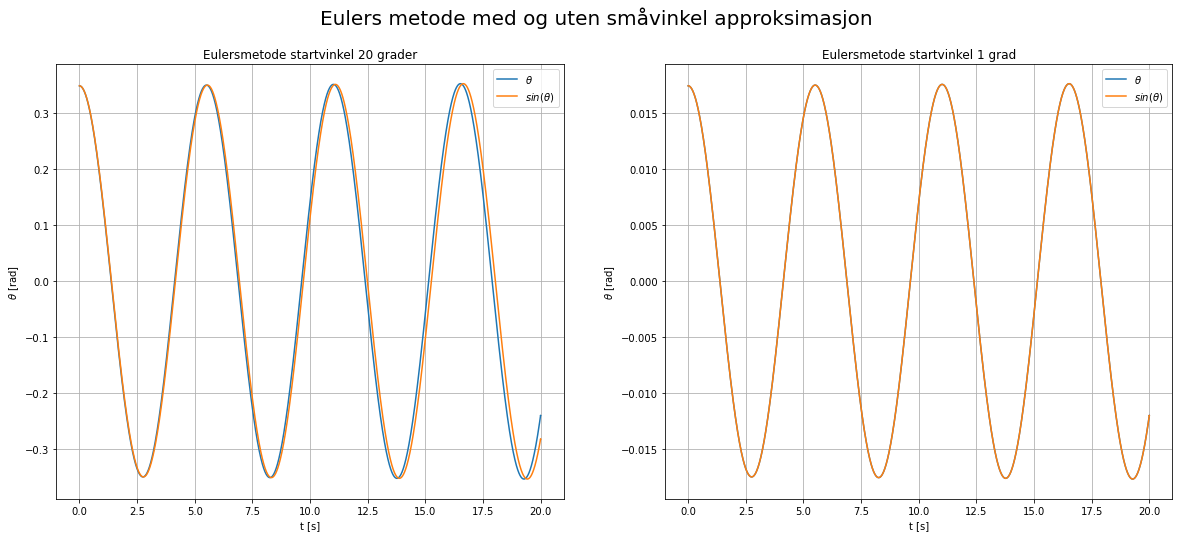

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle('Eulers metode med og uten småvinkel approksimasjon',size=20)

axes[0].plot(t_vales_småvinkel_20, vales_småvinkel_20[:,0])
axes[0].plot(t_vales_småvinkel_20, vales_20[:,0])
axes[0].legend([r'$\theta$', r'$sin(\theta)$'])
axes[0].set_title("Eulersmetode startvinkel 20 grader")
axes[0].grid()
axes[0].set_xlabel('t [s]')
axes[0].set_ylabel(r'$\theta$ [rad] ')

axes[1].plot(t_vales_småvinkel_20, vales_småvinkel_1[:,0])
axes[1].plot(t_vales_småvinkel_20, vales_1[:,0])
axes[1].legend([r'$\theta$', r'$sin(\theta)$'])
axes[1].set_title("Eulersmetode startvinkel 1 grad")
axes[1].grid()
axes[1].set_xlabel('t [s]')
axes[1].set_ylabel(r'$\theta$ [rad]')

Plottene over inneholder grafene for den numeriske løsningen med og uten småvinkelapproksimasjon vha. Euler for de ulike startvinklene. I begge grafene er det liten differanse mellom småvinkelapprokimasjonen og den uapproksimerte løsningen. I den andre grafen er det ikke mulig å se differanse mellom løsningene på øyemål. Altså er småvinkelapproksimasjonen en god tilnærming ved en startvinkel på $20^{\circ}$ og en særs god tilnærming ved en startvinkel på $1^{\circ}$. Dermed kan vi konkludere med at småvinkelapproksimasjonen stemmer godt for små vinkler, og avviket vil reduseres ved lavere vinkler.

Fra utledning av $\frac{d\vec{w}}{dt}$ ved småvinkel approksimasjon har vi likningen 
$$\frac{d^2\theta}{dt^2}=\ddot{\theta} = \frac{-mgh\theta}{I_{C}} \implies \ddot{\theta} + \frac{mgh\theta}{I_{C}} = 0 $$

Uttrykket over får den karakteristiske likningen: 
$$ \lambda^2 + \frac{mgh}{I_{C}} = 0 \implies \lambda = \sqrt{-\frac{mgh}{I_{C}}} = \sqrt{\frac{mgh}{I_{C}}}\cdot i$$

Likningen over har to imaginære løsninger. Den generelle løsningen er da 

$$\tilde{\theta}(t) = A\cdot e^{at}\cdot cos(\lambda t) + B \cdot e^{at}\cdot sin(\lambda t)$$

Dermed får vi: 

$$\tilde{\theta}(t) = A\cdot e^{0\cdot t}\cdot cos(\lambda t) + B \cdot e^{0\cdot t}\cdot sin(\lambda t) = A cos(\lambda t) + B sin(\lambda t)$$

Systemet har initialverdiene $\theta(0) = 0.01 \quad \text{og} \quad \omega(0) = 0$

$$\tilde{\theta}(0) = A cos(\lambda \cdot 0) + B sin(\lambda \cdot 0) = A = 0.01$$

$$ \frac{d\tilde{\theta}}{dt} = -0.01\cdot \lambda \cdot sin(\lambda t) + B\cdot \lambda \cdot cos(\lambda t)$$

$$\frac{d\tilde{\theta}(0)}{dt} = -0.01\cdot \lambda \cdot sin(\lambda \cdot 0) + B\cdot \lambda \cdot cos(\lambda \cdot 0) = 0$$

$$B\cdot \lambda = 0 \implies B = 0$$

$$\implies \tilde{\theta} = 0.01 cos(\lambda t) =0.01\cdot cos(\sqrt{\frac{mgh}{I_{C}}} t) $$

In [17]:
def RK4(f, x, y, steg, m_last = None):
    #Et steg av Runge-Kutta metoden
    
    # RK4 har muligheten til å ta inn last, vil bli relevant for senere scenarioer
    if m_last != None: 
        k1 =  f(x, y, m_last)
        k2 =  f(x + 0.5 * steg, y + np.multiply(0.5*steg,k1),m_last)
        k3 =  f(x + 0.5 * steg, y + np.multiply(0.5*steg, k2),m_last)
        k4 =  f(x + steg, y + steg*k3,m_last)
        
    # Dersom masse ikke er tilstede er det denne koden som vil kjøre     
    else: 
        k1 =  f(x, y)
        k2 =  f(x + 0.5 * steg, y + np.multiply(0.5*steg,k1))
        k3 =  f(x + 0.5 * steg, y + np.multiply(0.5*steg, k2))
        k4 =  f(x + steg, y + steg*k3)
    
    # Neste verdi av y
    y_next = y + np.multiply((steg / 6.0),(k1 + 2 * k2 + 2 * k3 + k4))

    #Neste verdi av x
    x_next = x + steg

    return x_next, y_next


Text(0, 0.5, '$\\theta$ differanse [rad]')

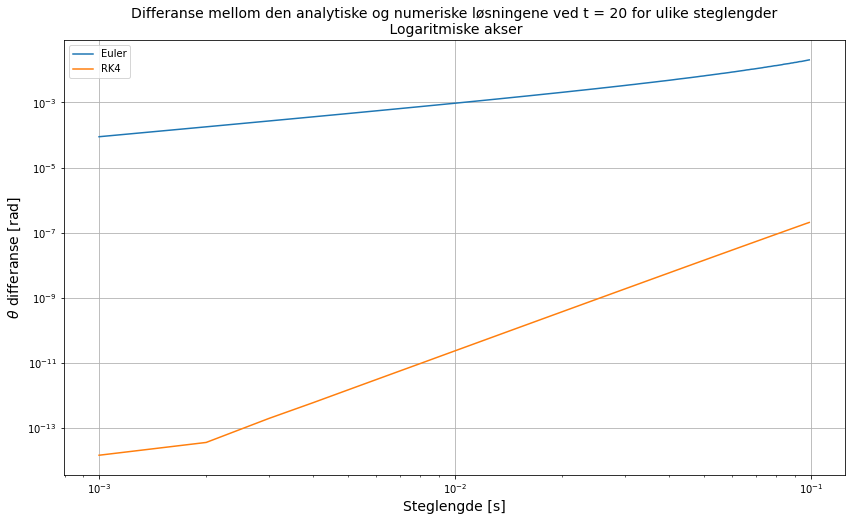

In [18]:
# Definerer theta_analytic som utledet over
def theta_analytic(t):
    return 0.01*np.cos(np.sqrt(m*g*h/I_C)*t)

# Definerer startverdier
theta_start = 0.01
omega_start = 0
w_start = np.array([theta_start, omega_start])

def differanse_method(f, method):
    liste_over_steg = [] # Liste over steglengder (nå tom, skal fylles)
    liste_over_diff = [] # Liste over differanser (nå tom, skal fylles)
    steg_lengde = 0.001
    
    while steg_lengde < 0.1:
        x_num_method, y_num_method = ode_solver(f, 0, 20, w_start, steg_lengde, method) # Finner den nummeriske løsningen
        method_ved_20t = y_num_method[-1][0] # Finner den siste thetaverdien, theta ved t = 20
        diff_method = np.abs(method_ved_20t - theta_analytic(20)) #Finner differansen til theta mellom den numeriske og analytiske løsningen ved t = 20
        liste_over_steg.append(steg_lengde) # Fyller lister
        liste_over_diff.append(diff_method)
        steg_lengde += 0.001                 # Øker steglengden
        
    return liste_over_steg, liste_over_diff  

#Finner differansene ved Euler og RK4 med den analytiske løsningen
steg_euler, differanse_euler = differanse_method(g_vec, euler)
steg_RK4, differanse_RK4 = differanse_method(g_vec, RK4)

#Plotter figur med differanser
plt.figure(figsize = (14,8))
plt.plot(steg_euler, differanse_euler)
plt.plot(steg_RK4, differanse_RK4)
plt.loglog()
plt.legend(['Euler','RK4'])
plt.grid()

plt.title('Differanse mellom den analytiske og numeriske løsningene ved t = 20 for ulike steglengder\n Logaritmiske akser', size = 14)
plt.xlabel('Steglengde [s]', size = 14)
plt.ylabel(r'$\theta$ differanse [rad]', size = 14)


I grafen over har vi plottet feilen mellom den analytiske løsningen og de numeriske løsningene fra metodene Euler og RK4. Generelt sett ligger feilen til Euler mye høyere enn feilen til RK4, men differansen mellom dem minker med økende skrittlengde. Eksempelvis vil feilen ved steglengde lik 0.001 ved bruk av Euler være av størrelsesorden $10^{-4}$, til sammenligning er den tilsvarende feilen ved RK4 av størrelsesorden $10^{-14}$. Vi legger merke til at stigningstallet for grafen til RK4 er større enn stigningstallet for grafen til Euler
For RK4 vil grafen få en knekk og flate ut ved små steglengder. Dette kommer av at datamaskinen gjør numeriske avrundinger, og ikke er like presis som RK4-metoden. For små steglengder vil feilen i RK4 metoden være av en svært liten størrelsesorden. Datamaskiner har også en viss feil, og ved svært små steglengder vil denne feilen påvirke grafen over. Grunnen til dette er at datamaskinen gjør avrundinger på feilmålingene. Dersom datamaskinen ikke hadde hatt denne presisjonen ville grafen for RK4 metoden ikke knekke og flate ut, men fortsatt med samme stigningstall for alle steglengder. 

In [19]:
def lin(x, a, b):
    return a*x + b
popt1, pcov1 = curve_fit(lin, np.log(steg_RK4), np.log(differanse_RK4))
popt2, pcov2 = curve_fit(lin, np.log(steg_euler), np.log(differanse_euler))

print("Stigningstallet til RK4 er: ", popt1[0], " og stigningstallet til euler er: ", popt2[0])

Stigningstallet til RK4 er:  3.896288274930615  og stigningstallet til euler er:  1.2325529118419007


Feilen til en nummerisk metode kan uttrykkes ved hjelp av uttrykket under: 

$$ \lVert e_{N} \lVert \le Ch^{p}$$

hvor p er et uttrykk for metodens orden.

Når vi plottet feilen over benyttet vi oss av logaritmiske akser, dette betyr at vi kan skrive om uttrykket for feilen slik: 

$$log(\lVert e_{N} \lVert) \le log (Ch^{p}) = log(C) + log (h^{p}) = log(C) + p\cdot log (h) $$

p verdien vil være stigningstallet til feilen til de ulike metodene. Vi har regnet ut stigningstallet for de to ulike metodene. Dermed har vi funnet ut at p for RK4 er $3.896 \approx 4$ og p for euler er $1.233 \approx 1$. Fra dette kan vi konkludere med at euler må være en førsteordensmetode, mens RK4 er en fjerdeordensmetode.

Fra dette punktet vil vi ikke lengre se på det fortrengte arealet av vann som en konstant. Arealet vil da kunne beskrives ved hjelp av likningen under:

$$ A = \frac{1}{2}R^{2}\cdot(\gamma-sin(\gamma))\quad \text{hvor } \gamma \text{ kan beskrives som: }$$

$$ \gamma = 2\cdot arccos(cos(\beta/2)-\frac{4}{3\pi}(1-cos(\theta))+ \frac{\Delta y_{C}}{R})$$

På grunn av variasjon i mengde fortrengt vann vil heller ikke skipet sitt massesenter ligge i ro, og vi må ta hensyn dens bevegelse. 


In [20]:
# Hjelpefunksjon, vil brukes senere. Beskriver hvor stor del av båten som er i kontakt med vannoverflaten
# Gjelder når kun når arealet av vannet som fortrenges ikke er konstant, ellers sektorvinkelen beskrives av beta
def gamma_funksjon(beta, theta, y_C):
    return 2*np.arccos(np.cos(beta/2)-4/(3*np.pi)*(1-np.cos(theta)) + (y_C-y_C0)/R)

#Definerer utrykk for arealet av fortrengt vann 
def areal_fortrengt_vann(gamma):
    return 1/2*R**2*(gamma - np.sin(gamma))

Kreftene som virker på systemet er $F_{G} = -mg$ og  $F_{B} = A\sigma_{0}g$, disse gir opphav til dreiemomentet $\tau_{B} = -F_{B}h\cdot sin(\theta)$. Kreftene vil kun virke i y-retning, noe som medfører at massesenteret sin x-koordinat og dens tilhørende hastighetskomponent vil forbli lik 0 inntil annet spesifiseres. Ved Newtons 2. lov vet vi at: 

$$ \sum F = F_{G} + F_{B} = -mg + A\sigma_{0}g = m \frac{d^{2}y_{C}}{dt^{2}} = m \frac{dv_{y}}{dt} $$

Dersom denne likningen løses med hensyn på $\frac{dv_{y}}{dt}$ får vi: 

$$ \frac{dv_{y}}{dt} = \frac{ A\sigma_{0}-m}{m}g $$

Summen av dreiemomentene gir oss følgende: 

$$ \sum \tau = I_{C}\frac{d\omega}{dt} = \tau_{B} = -F_{B}h\cdot sin(\theta) = -A\sigma_{0}gh\cdot sin(\theta) \implies I_{C}\frac{d\omega}{dt} =-A\sigma_{0}gh\cdot sin(\theta)$$

$$ \implies \frac{d\omega}{dt} = \frac{-A\sigma_{0}gh\cdot sin(\theta)}{I_{C}}$$

Ettersom vi ønsker å analysere flere elementer nå enn tidligere vil $w$ utvides. Vi vil her i tillegg til å studere vinkelutslag og vinkelhastighet være interessert i massesenterets koordinater og hastighetskomponentene til massesenteret. Dermed får vi: 

$$ \vec{w} = [\theta \quad \omega \quad x_{C} \quad y_{C} \quad v_{x} \quad v_{y}]^{T} $$


Ved å derive på begge sider får vi 

$$ \vec{f}(t,\vec{w}) =\frac{d\vec{w}}{dt} = [\frac{d\theta}{dt} \quad \frac{d\omega}{dt} \quad \frac{dx_{C}}{dt} \quad \frac{dy_{C}}{dt} \quad \frac{dv_{x}}{dt} \quad \frac{dv_{y}}{dt}]^{T} = [\omega \quad \frac{d\omega}{dt} \quad v_{x} \quad v_{y} \quad \frac{dv_{x}}{dt} \quad \frac{dv_{y}}{dt}]^{T} $$

$$\vec{f}(t,\vec{w}) =\frac{d\vec{w}}{dt} = [\omega \quad \frac{-A\sigma_{0}gh\cdot sin(\theta)}{I_{C}} \quad 0 \quad v_{y} \quad 0 \quad \frac{ A\sigma_{0}-m}{m}g]^{T} =[w[1] \quad \frac{-A\sigma_{0}gh\cdot sin(w[0])}{I_{C}} \quad 0 \quad w[5] \quad 0 \quad \frac{ A\sigma_{0}-m}{m}g]^{T} $$

Initialverdiene vi velger å benytte oss av er: $\theta (0) = 20 ^{\circ}$ og $\omega(0)= 0$. Dersom ikke annet spesifiseres vil følgende initialbetingelser gjelde: $x_C = 0$ , $ y_C = y_{CO}$ (som definert tidligere), $v_x = 0$ og $v_y = 0$.


In [21]:
def diff_func(t, w): # Definerer som utledet ovenfor
    gamma = gamma_funksjon(beta, w[0], w[3]) #Finner sektorvinkelen ved gitte betingelser, funksjonenen er definert tidligere
    A = areal_fortrengt_vann(gamma) #Finner hvor stort arealet av det fortrengte vannet er, gitt sektorvinkelen
    
    return np.array([w[1], -A*sigma_0*g*h/I_C* np.sin(w[0]), 0, w[5], 0, (A*sigma_0-m)*g/m]) #Returverdier


Text(0, 0.5, '$y_C$ [m]')

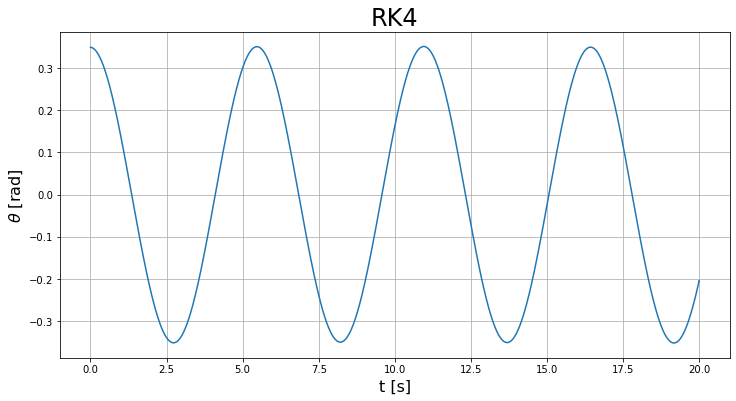

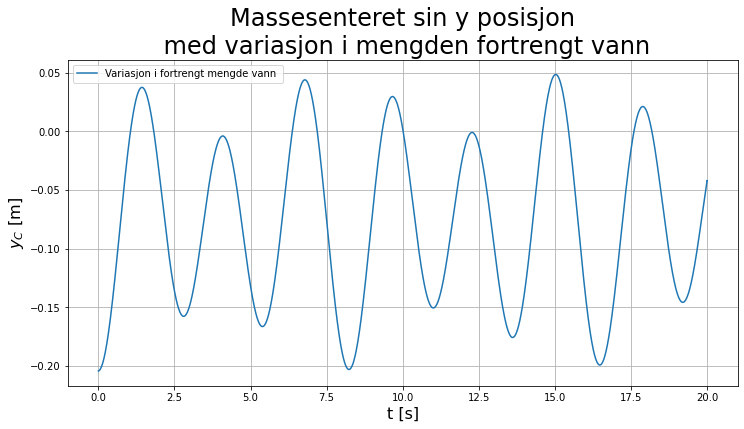

In [22]:
steglengde_RK4 = 0.01 # Oppgitt steglengde
w_20 = np.array([theta_0, omega_0,0,y_C0,0,0]) # theta_0, omega_0 er definert tidligere

# Løser diff_func ved hjelp av ODE_solver
t_verdier, verdier = ode_solver(diff_func, t0, tend, w_20, steglengde_RK4, RK4)

#Plotter løsningen over for theta
plt.figure(figsize=(12, 6))
plt.plot(t_verdier, verdier[:,0])
plt.grid()
plt.title("RK4", size = 24)

plt.xlabel('t [s]', size = 16)
plt.ylabel(r'$\theta$ [rad]', size = 16)


# Plotter massesenteret sin y posisjon som funksjon av tid
plt.figure(figsize=(12, 6))
plt.plot(t_verdier, verdier[:,3])
plt.grid()
plt.legend(['Variasjon i fortrengt mengde vann '])

plt.title("Massesenteret sin y posisjon\n med variasjon i mengden fortrengt vann", size = 24)
plt.xlabel('t [s]', size = 16)
plt.ylabel(r'$y_C$ [m]', size = 16)

I den første av de to grafene over har vi plottet vinkelutslaget ($\theta$) som funksjon av tid. Denne fremstår som en harmonisk oscillator om y = 0. Under har vi plottet massesenteret sin y posisjon som funksjon av t. Av plottet kan vi se at posisjonen til massesenteret vil oscillere rundt en likvekt på rundt y $\sim$ -0.07. Amplitudene vil ikke være konstante. Årsaken til dette er massesenteret sin y posisjon er avhengig av mengden fortrengt vann. Denne mengden vil variere etter som båten gynger. Ved de største vinkelutslagene vil mengden fortrengt vann også ha sitt maksimum. Dersom vi ser på grafen med hensyn til krefter kan man se en tydelig sammenheng. La oss se på det første toppunktet. Her vil mengden fortrengt vann være liten, og dermed vil også oppdriftskraften være liten. Altså vil den dominerende kraften være tyngdekraften. Tyngdekraften vil presse båten ned i vannet, noe som betyr at massesenteret sin y posisjon vil minke. Når båten befinner seg lagt nede i vannet vil oppdriftskraften bli stor. Dette vil igjen medføre til å båten vil bli presset oppover, og dermed vil massesenteret sin y posisjon øke. Det vil dermed være en kombinasjon av vugging og dupping som vil føre til massesenteret sin y-posisjon.
Initialverdiene vi velger å benytte oss av er: $\theta (0) = 20 ^{\circ}$ og $\omega(0)= 0$

In [23]:
# Lager en ny ODE_solver som tar høyde for kantring
def ode_solver_kantring(funksjon, t0, tend, w0, steg, method):
    '''
    f: funksjon som skal løses
    t0, tend: start og slutt tid
    w0: startverdier til w 
    steg: steglengde
    method: metode for løsning'''
    
    n = round((tend-t0)/steg + 0.5) #antall steg, plusser på 0.5 for å alltid runde opp hvis ikke nøyaktig. Bruker dette til å fylle opp lister ved eventuell kantring
    
    w_num = np.zeros((n,len(w0))) #lager en tom liste for w-verdier av lengde n
    t_num = np.linspace(t0, tend, n)  #lager en liste med t verdier

    #ny_steglengde = t_num[1]-t_num[0] 

    tn = t0                # definerer startverdiene til tn og wn
    wn = w0

    #kjører valgt metode for alle t-verdier
    for i in range(n):
        tn, wn = method(funksjon, tn, wn, steg)    #et steg med valgt metode
        
        if abs(wn[0]) > (np.pi - gamma_funksjon(beta, wn[0], wn[3])) / 2:  #sjekker om kriteriet for kantring er oppfylt

            w_num[i:,0] = np.sign(w_num[i-1][0])*np.pi/2  
            return t_num, w_num

                
        w_num[i] = wn  #legger til w i listen over w-verdier
    
    if tend != tn:
        siste_steg = tend - tn
        tn, wn = method(funksjon, tn, wn, siste_steg)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        w_num = np.concatenate((w_num, np.array([wn])))
        t_num = np.append(t_num,tn) 
    
    return t_num, w_num


Text(0, 0.5, '$\\theta$')

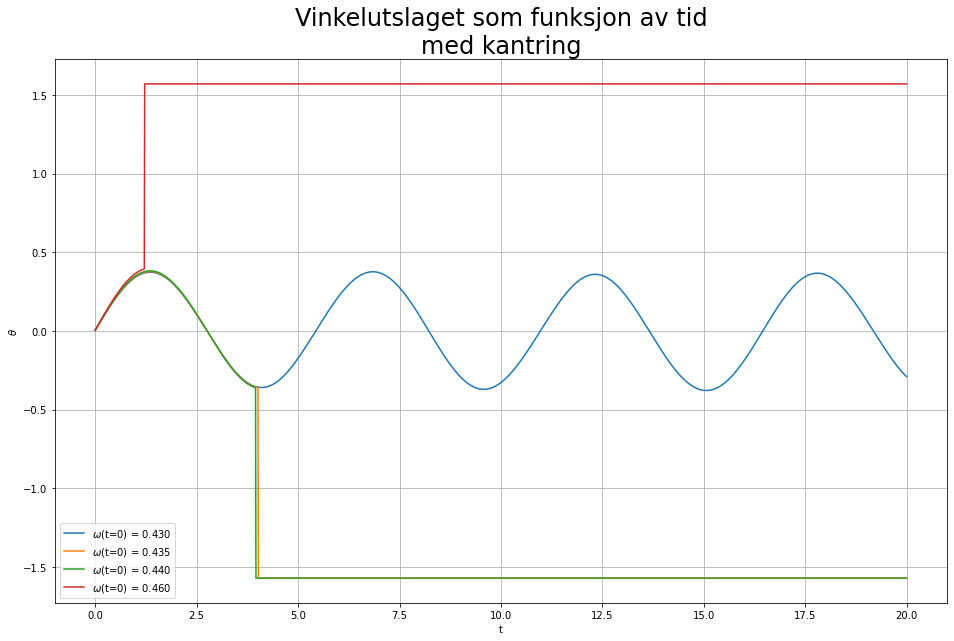

In [24]:
# Sjekker kantring for ulike omega0_verdier
# Her vil w0 ha formen: w0_kantring = np.array([theta0_kantring, omega0_kantring, 0, y_C0, 0, 0])
theta0_kantring = 0

t_list1, w_list1 = ode_solver_kantring(diff_func, t0, tend, [theta0_kantring, 0.430, 0, y_C0, 0, 0], steglengde_RK4, RK4)
t_list2, w_list2 = ode_solver_kantring(diff_func, t0, tend, [theta0_kantring, 0.435, 0, y_C0, 0, 0], steglengde_RK4, RK4)
t_list3, w_list3 = ode_solver_kantring(diff_func, t0, tend, [theta0_kantring, 0.440, 0, y_C0, 0, 0], steglengde_RK4, RK4)
t_list4, w_list4 = ode_solver_kantring(diff_func, t0, tend, [theta0_kantring, 0.460, 0, y_C0, 0, 0], steglengde_RK4, RK4)

plt.figure(figsize=(16, 10))
plt.plot(t_list1, w_list1[:,0])
plt.plot(t_list2, w_list2[:,0])
plt.plot(t_list3, w_list3[:,0])
plt.plot(t_list4, w_list4[:,0])
plt.grid()

plt.legend(['$\omega$(t=0) = 0.430','$\omega$(t=0) = 0.435', '$\omega$(t=0) = 0.440','$\omega$(t=0) = 0.460'])
plt.title("Vinkelutslaget som funksjon av tid\nmed kantring", size = 24)
plt.xlabel('t')
plt.ylabel(r'$\theta$')

I funksjonen over har vi plottet vinkelutslaget som funksjon av tiden ved ulike vinkelhastigheter ved start. Målet med dette var å se for hvilke vinkelhastigheter kantring vil oppstå, og hvor skille mellom kantring og ikke kantring gikk. Kantring illustreres med at vinkelutslaget settes konstant lik $\pm \pi /2 $. Av plottet over kan vi se at minimumsvinkelhastigheten for kantring vil ligge mellom 0.430 og 0.435, med startvinkel lik $0^{\circ}$. Med bakgrunn i dette benytter vi oss av whileløkke til å finne den minste startvinkelhastigheten som vil føre til kantring. Vi har en nøyaktighet på $10^{-4}$, da dette gir et svar med høy nok nøyaktighet, uten for lang kjøretid. Dermed finner vi at minste startvinkelhastigheten som fører til kantring er 0.4317 (se under).

In [25]:
omegastart =  0.430

while True: 
    t_min_omega, w_min_omega = ode_solver_kantring(diff_func, t0, tend, [theta0_kantring, omegastart, 0, y_C0, 0, 0], steglengde_RK4, RK4)
    if abs(w_min_omega[:,0][-1]) == np.pi/2:
        break
    omegastart += 0.0001
    
print("Den minste startvinkelhastigheten som fører til kantring er: ", round(omegastart,4))


Den minste startvinkelhastigheten som fører til kantring er:  0.4317


Vi ønsker nå å se på skipet med en last med en masse $m_{L}$, denne lasten vil opptre som en punktpartikkel. Lasten vil kunne bevege seg friksjonsfritt på dekk. Til å begynne med ser vi på et skip uten gjerde, dette vil si at lasten vil kunne falle av. På grunn av at vi tilsetter masse er det flere av likevekts størrelsene som må beregnes på nytt, det er flere krefter som påvirker systemet og gir opphav til flere dreiemoment. Vi vil her benytte oss av $\vec{w}$ som definert under.

$$\vec{w} = [\theta \quad \omega \quad x_C \quad y_C \quad v_x \quad v_y \quad s_L \quad v_L]^T$$

Av nye variabler har vi $s_L$ som beskriver lastens posisjon relativt til metasenteret og $v_L$ er lastens hastighet, hvor $\frac{ds_L}{dt} = v_L$. Ved derivasjon av $\vec{w}$ får vi: 

$$ \vec{f}(t,\vec{w}) =\frac{d\vec{w}}{dt} = [\frac{d\theta}{dt} \quad \frac{d\omega}{dt} \quad \frac{dx_{C}}{dt} \quad \frac{dy_{C}}{dt} \quad \frac{dv_{x}}{dt} \quad \frac{dv_{y}}{dt} \quad \frac{ds_L}{dt} \quad \frac{dv_L}{dt}]^{T} = [\omega \quad \frac{d\omega}{dt} \quad v_{x} \quad v_{y} \quad \frac{dv_{x}}{dt} \quad \frac{dv_{y}}{dt} \quad v_L \quad \frac{dv_L}{dt}]^{T}$$


Kreftene som virker på skipet er:

$$ F_{G} = - m_{tot}g \quad , \quad F_{B} = A\sigma_{0}g  \quad , \quad F_L^{y} = - m_{L}gcos^2(\theta) \quad , \quad F_{L}^{x} = m_{L}gcos(\theta)sin(\theta)$$

Hvor de tre førstnevnte virker i y-retning, mens sistnevnte virker i x-retnign. Disse kreftene vil gi opphav til følgende dreiemomenter: 

$$\tau_{B} = - F_{B}hsin(\theta) \quad , \quad \tau_{L}= -m_{L}gcos(\theta)s_{L}$$

Ved Newtons 2.lov får vi følgende likninger: 

$$\sum F_{y} = F_{G} + F_{B} +  F_{L}^{y} = - m_{tot}g + A\sigma_{0}g - m_{L}gcos^2(\theta) = m_{tot}a_{y} = m_{tot}\frac{dv_{y}}{dt} \quad \quad \sum F_{x} = F_L^{x} = m_{L}gcos(\theta)sin(\theta) = m_{tot}a_{x} = m_{tot}\frac{dv_{x}}{dt}$$

$$\implies \frac{dv_y}{dt} = \frac{- m_{tot}g + A\sigma_{0}g - m_{L}gcos^2(\theta)}{m_{tot}} \qquad \frac{dv_x}{dt} = \frac{m_{L}gcos(\theta)sin(\theta)}{m_{tot}}$$ 

$$\sum \tau = \tau_{B}  + \tau_{L}= - F_{B}hsin(\theta) - m_{L}gcos(\theta)s_{L} =- A\sigma_{0}ghsin(\theta) - m_{L}gcos(\theta)s_{L} = I_C\frac{d\omega}{dt}$$

$$\implies \frac{d\omega}{dt} = \frac{- A\sigma_{0}ghsin(\theta) - m_{L}gcos(\theta)s_{L}}{I_C}$$


Vi er også interessert i lastens dynamikk, altså dens posisjon og hastighet, samt kreftene som virker på den. Den eneste kraften som vil virke på laste er dens tyngdekraft. Ved et vinkelutslag $\theta$ vil lasten oppføre seg som en kloss på skråplan med samme vinkel. Vi er kun interessert i lastens bevegelese langs dekk (langs skråplanet). Summen av kreftene som virker på klossen langs dekk er: 
$$ \sum F_{dekk} = -m_Lg\cdot sin(\theta) = m_La_{L} = m_L\frac{dv_L}{dt} \implies \frac{dv_L}{dt} = -g\cdot sin(\theta)$$

Dermed kan vi utnytte disse utrykkene til å skrive $\vec{f}(t,\vec{w}) =\frac{d\vec{w}}{dt}$ som: 

$$\vec{f}(t,\vec{w}) =\frac{d\vec{w}}{dt} = [\omega \quad \frac{- A\sigma_{0}ghsin(\theta) - m_{L}gcos(\theta)s_{L}}{I_C} \quad v_{x} \quad v_{y} \quad \frac{m_{L}gcos(\theta)sin(\theta)}{m_{tot}} \quad \frac{- m_{tot}g + A\sigma_{0}g - m_{L}gcos^2(\theta)}{m_{tot}} \quad v_L \quad -g\cdot sin(\theta]^{T}$$

$$\vec{f}(t,\vec{w}) =\frac{d\vec{w}}{dt} = [w[1] \quad \frac{- A\sigma_{0}ghsin(w[0]) - m_{L}gcos(w[0])w[6]}{I_C} \quad w[4] \quad w[5] \quad \frac{m_{L}gcos(w[0])sin(w[0])}{m_{tot}} \quad \frac{- m_{tot}g + A\sigma_{0}g - m_{L}gcos^2(w[0])}{m_{tot}} \quad v_L \quad -g\cdot sin(w[0])]^{T}$$


In [26]:
# Når skipet har en last (punktmasse) vil massetettheten til båten pr. lengde enhet (sigma) endres
# Dette vil påvirke 
def f_beta_last(beta_last, m_last):
    m_tot = m + m_last        #definerer totalmasse til skip og last
    sigma_last = m_tot / A_s
    return (np.pi*sigma_last)/(sigma_0) + np.sin(beta_last)

In [27]:
#Fikspunktfunksjon
def fixedpoint_med_last(g, m_last, x0, tol=1.e-8, max_iter=30):
    ''' Solve x=g(x) by fixed point iterations
        The output of each iteration is printed
    Input:
        g:   The function g(x)
        x0:  Initial values
        tol: The tolerance
    Output:
        The root and the number of iterations
    '''
    x = x0                               # Setter den første verdien lik x, bruker dette for å starte iterasjonene
    #print(f"k ={0:3d}, x = {x:14.10f}")  # Printer antall iterasjoner og tilhørende x verdi
    
    # Itererer til feilen (diffransen mellom to målinger) er mindre enn en toleranse, eller maxiterasjoner er oppnådd
    for k in range(max_iter):            
        x_old = x                        # Lagrer den gamle verdien, da denne skal brukes for å estimere feil
        x = g(x,m_last)                  # Finner verdien til funksjonen ved en gitt den forrige verdien
        err = abs(x-x_old)               # Finner et feilestimat, differanse mellom to x verdier som kommer etter hverandre
        #print(f"k ={k+1:3d}, x = {x:14.10f}") # Printer antall iterasjoner og tilhørende x verdi
        if err < tol:                    # Sjekker om feilen er mindre enn en gitt toleranse
            break
    return x, k+1

In [28]:
def gamma_funksjon_med_last(beta, theta, y_C, y_C0):
    return 2*np.arccos(np.cos(beta/2)-4/(3*np.pi)*(1-np.cos(theta)) + (y_C-y_C0)/R)

In [29]:
def ode_solver_med_last(funksjon, t0, tend, w0, steg, method, m_last, gjerde = False):
    '''
    f: funksjon som skal løses
    t0, tend: start og slutt tid
    w0: startverdier til w 
    steg: steglengde
    method: metode for løsning'''
    
    har_lasten_falt_av = False
    
    n = round((tend-t0)/steg + 0.5) #antall steg, plusser på 0.5 for å alltid runde opp hvis ikke nøyaktig. Bruker dette til å fylle opp lister ved eventuell kantring
    
    w_num = np.zeros((n,len(w0))) #lager en tom liste for w-verdier av lengde n
    t_num = np.linspace(t0, tend, n)  #lager en liste med t verdier

    #ny_steglengde = t_num[1]-t_num[0] 

    tn = t0                # definerer startverdiene til tn og wn
    wn = w0
    
    # Tar hensyn til at startverdiene ikke vil være like for ulike masser
    beta_last, iterasjoner = fixedpoint_med_last(f_beta_last, m_last, x0 = 2.31, tol=1.e-6, max_iter=50)
    if iterasjoner == 50: 
        print("WARNING: Maksiterasjoner nådd") # Advarer oss om maks iterasjoner nås, da er det ikke sikkert løsningen beta er god
    
    # Konstantene under tar hensyn til økt start tyngde
    y_M0_last = R*np.cos(beta_last/2)      #Høyden til Metasenteret
    y_C0_last = y_M0_last - h              #Høyden til Massesenteret
    y_B0_last = y_M0_last - (4*R*np.sin(beta_last/2)**3)/(3*(beta_last-np.sin(beta_last))) # Høyden til oppdriftkraftensangrepspunkt
    y_D0_last = y_M0_last - R              #Høyden til det dypeste punktet 
    
    
    #kjører valgt metode for alle t-verdier
    for i in range(n):
        m_tot = m + m_last        #definerer totalmasse til skip og last
        I_C_last = 1/2*m_tot*R**2*(1-32/(9*np.pi**2))  #definerer I_C når last er inkludert
        
        tn, wn = method(funksjon, tn, wn, steg,m_last)    #et steg med valgt metode
        
        #Kantring!!
        if abs(wn[0]) > (np.pi - gamma_funksjon_med_last(beta_last, wn[0], wn[3],y_C0_last)) / 2:  #sjekker om kriteriet for kantring er oppfylt
            w_num[i:,0] = np.sign(w_num[i-1][0])*np.pi/2  
            

            if har_lasten_falt_av:
                return t_num, w_num, tid_lasten_falt_av, indeks # Finner ut hvor lasten falt av
    
            else:
                return t_num, w_num , t_num[i] , i # Lasten falt ikke av, retunerer den siste posisjonen til lasten før kantring

        # Faller lasten av??
        if abs(wn[6]) > R: #Sjekker om lasten har forflyttet seg av kanten
            
            if gjerde: #Sjekker om vi har et gjerde, dersom vi har gjerde vil lasten ikke falle av
                wn[7] = 0 #Lastens fart settes lik 0
                
                #Posisjonen til lasten settes lik kantens posisjon
                if wn[6] > 0:
                    wn[6] = R 
                    
                else: 
                    wn[6] = - R 

            else: # Hvis vi ikke har gjerde vil lasten falle av
                if not har_lasten_falt_av : # Sjekker at lasten ikke allerede har falt av
                    m_last, m_tot = 0, m  #setter massen til lasten lik null siden lasten faller av
                    tid_lasten_falt_av = t_num[i] # Finner ut når lasten falt av
                    indeks = i
                    har_lasten_falt_av = True # Gir oss beskjed om at lasten har falt av
                    
                    #Setter konstanter uten last
                    beta_last = beta
                    y_M0_last = y_M0 
                    y_C0_last = y_C0
                    y_B0_last = y_B0
                    y_D0_last = y_D0
                    
        w_num[i] = wn  #legger til w i listen over w-verdier
    
    if tend != tn:
        siste_steg = tend - tn
        tn, wn = method(funksjon, tn, wn, siste_steg, m_last)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        w_num = np.concatenate((w_num, np.array([wn])))
        t_num = np.append(t_num,tn) 
    
    
    
    if har_lasten_falt_av:
        return t_num, w_num, tid_lasten_falt_av, indeks
    
    else:
        return t_num, w_num, 100 , 100 


In [30]:
# w=[theta, omega, x_C, y_C, v_x, v_y, s_L, v_L]
w0_med_last = [0, 0.20, 0, y_C0, 0, 0, 3, 0]

def diff_func_last(t, w, m_last):
    if m_last != None: 
        m_tot = m + m_last   #definerer totalmasse til skip og last
    else: 
        m_tot = m
        m_last = 0
    I_C_last = 1/2*m_tot*R**2*(1-32/(9*np.pi**2))  #definerer I_C når last er inkludert
    
    #Finner beta(sektorvinkelen) med last
    beta_last, iterasjoner = fixedpoint_med_last(f_beta_last, m_last, x0 = 2.31, tol=1.e-6, max_iter=50)
    
    y_M0_last = R*np.cos(beta_last/2)  
    y_C0_last = y_M0_last - h
    
    gamma = gamma_funksjon_med_last(beta_last, w[0], w[3],y_C0_last) # Finner sektorvinkelen vha theta og y_C og beta
    A = areal_fortrengt_vann(gamma)
    return np.array([w[1], (-g*(A*sigma_0*h*np.sin(w[0]) + m_last*np.cos(w[0])*w[6]))/I_C_last, w[4], w[5], (m_last*g*np.cos(w[0])*np.sin(w[0]))/m_tot, (A*sigma_0-m_tot-m_last*(np.cos(w[0]))**2)*g/m_tot, w[7], -g*np.sin(w[0])])  # den deriverte av w


t_last_1, w_last_1, t_lasten_falt_av_1, indeks_1 = ode_solver_med_last(diff_func_last, t0, 40, w0_med_last, 0.01, RK4, 0.001*m)
t_last_2, w_last_2, t_lasten_falt_av_2, indeks_2 = ode_solver_med_last(diff_func_last, t0, 40, w0_med_last, 0.01, RK4, 0.08*m)


Text(0, 0.5, '$S_L$')

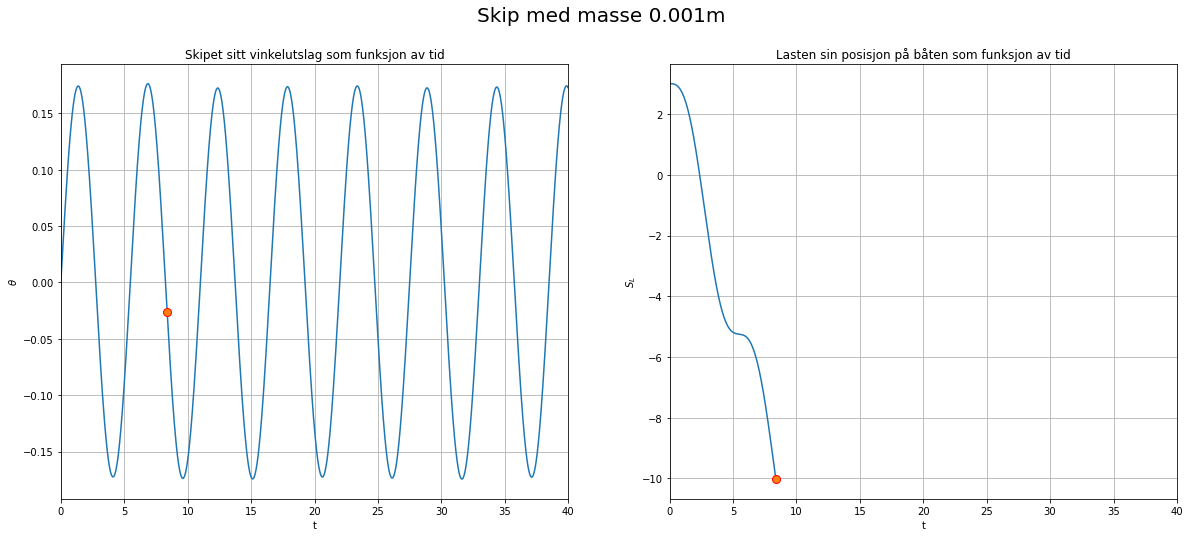

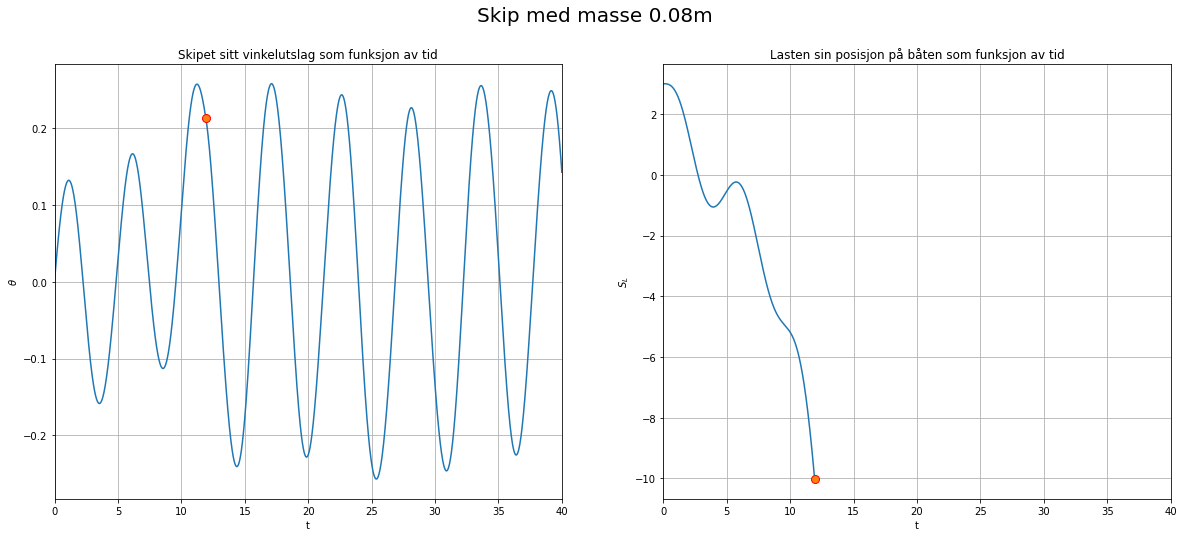

In [31]:
#Plotter lasten sin posisjon og vinkelutslaget som funksjon av tid for ulike masser
#Punktet hvor massen faller av er illustert med en rød prikk
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle('Skip med masse 0.001m',size=20)

axes[0].plot(t_last_1, w_last_1[:,0])
axes[0].set_title("Skipet sitt vinkelutslag som funksjon av tid")
axes[0].plot(t_lasten_falt_av_1, w_last_1[indeks_1][0],marker="o", markersize=8, markeredgecolor="red")
axes[0].grid()
axes[0].set_xlim([0, 40])
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$\theta$')

axes[1].plot(t_last_1[0:indeks_1], w_last_1[:,6][0:indeks_1])
axes[1].set_title("Lasten sin posisjon på båten som funksjon av tid")
axes[1].plot(t_lasten_falt_av_1, w_last_1[indeks_1][6],marker="o", markersize=8, markeredgecolor="red")
axes[1].grid()
axes[1].set_xlim([0, 40])
axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$S_L$')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle('Skip med masse 0.08m',size=20)

axes[0].plot(t_last_2, w_last_2[:,0])
axes[0].set_title("Skipet sitt vinkelutslag som funksjon av tid")
axes[0].plot(t_lasten_falt_av_2, w_last_2[indeks_2][0],marker="o", markersize=8, markeredgecolor="red")
axes[0].grid()
axes[0].set_xlim([0, 40])
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$\theta$')

axes[1].plot(t_last_2[0:indeks_2], w_last_2[:,6][0:indeks_2])
axes[1].set_title("Lasten sin posisjon på båten som funksjon av tid")
axes[1].plot(t_lasten_falt_av_2, w_last_2[indeks_2][6],marker="o", markersize=8, markeredgecolor="red")
axes[1].grid()
axes[1].set_xlim([0, 40])
axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$S_L$')

For skipet med en last med masse lik 0.001m vil lasten falle av etter omtrent 7-8 sekunder. Vinkelutslaget til dette skipet vil ikke vesentlig endre seg etter at massen faller av. Dette skyldes at lasten har relativ liten masse og gjør dermed ikke en stor forskjell på systemt. På skipet med last med masse 0.08m vil lasten falle av etter omtrent 12 sekunder. Det vil altså ta lengre tid for den tyngre lasten å falle av skipet. Dette kommmer av at den tyngre lasten i større grad vil motsette seg endring i hastighet. Når den tyngre massen beveger seg mot skipets ende vil dreiemomentet som lasten gir skipet øke, og dermed får vi også en økning i vinkelutslaget. I denne situasjonen vil det være vanskelig for skipet å vugge tilbake. Økningen i vinkelutslag kan vi se i figuren nederst til venstre. Etter at lasten faller av (rødt prikk) vil skipet bevege seg tilbake til en duppebevegelse, med små endringer i amplituden. 

Vi skal nå se vi på situasjonen der vi har last på et skip med gjerde.

In [32]:
# Finner verdier for de ulike lastene, med ulik masse, denne gangen med gjerde
t_gjerde_1, w_gjerde_1, t_gjerde_lasten_falt_av_1, indeks_gjerde_1 = ode_solver_med_last(diff_func_last, t0, 40, w0_med_last, 0.01, RK4, 0.001*m,True)
t_gjerde_2, w_gjerde_2, t_gjerde_lasten_falt_av_2, indeks_gjerde_2 = ode_solver_med_last(diff_func_last, t0, 40, w0_med_last, 0.01, RK4, 0.08*m,True)


Text(0, 0.5, '$S_L$')

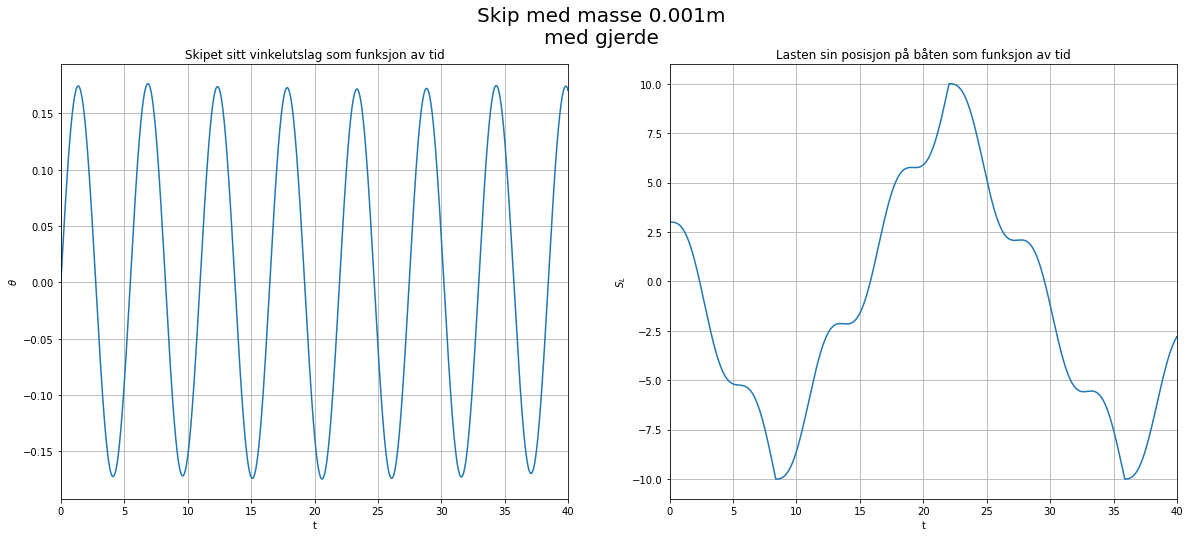

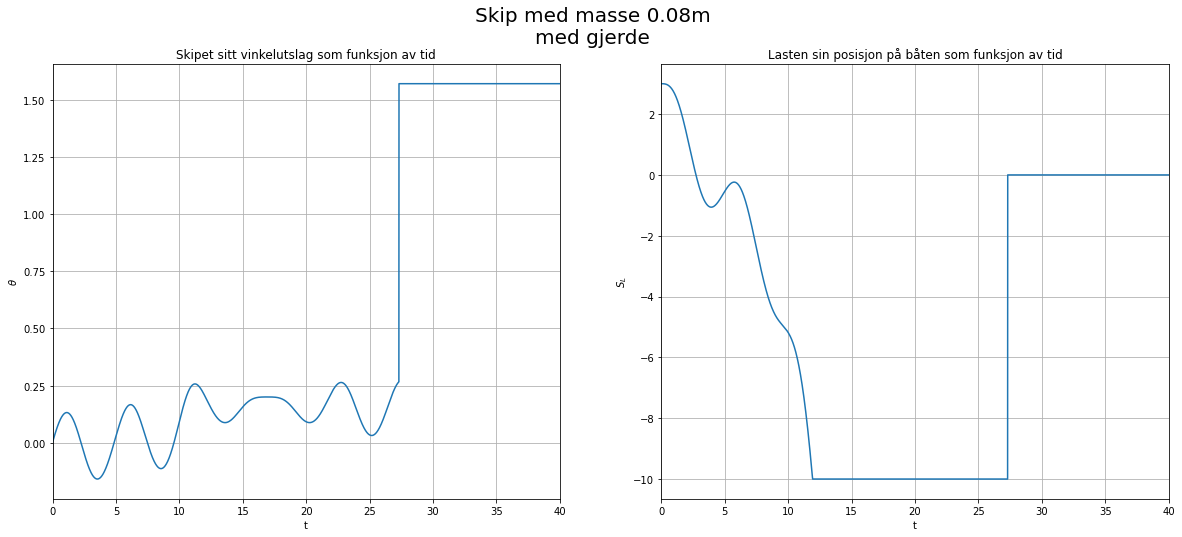

In [33]:
#Plotter lasten sin posisjon og vinkelutslaget som funksjon av tid for ulike masser, med gjerde
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle('Skip med masse 0.001m\nmed gjerde',size=20)

axes[0].plot(t_gjerde_1, w_gjerde_1[:,0])
axes[0].set_title("Skipet sitt vinkelutslag som funksjon av tid")
axes[0].grid()
axes[0].set_xlim([0, 40])
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$\theta$')

axes[1].plot(t_gjerde_1, w_gjerde_1[:,6])
axes[1].set_title("Lasten sin posisjon på båten som funksjon av tid")
axes[1].grid()
axes[1].set_xlim([0, 40])
axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$S_L$')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle('Skip med masse 0.08m\nmed gjerde',size=20)

axes[0].plot(t_gjerde_2, w_gjerde_2[:,0])
axes[0].set_title("Skipet sitt vinkelutslag som funksjon av tid")
axes[0].grid()
axes[0].set_xlim([0, 40])
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$\theta$')

axes[1].plot(t_gjerde_2, w_gjerde_2[:,6])
axes[1].set_title("Lasten sin posisjon på båten som funksjon av tid")
axes[1].grid()
axes[1].set_xlim([0, 40])
axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$S_L$')

Vinkelutslaget til et skip med last på 0.001m med gjerde har gjennomgående jevn amplitude, i likhet med tilfellet uten gjerde. Dette skyldes at lastens masse er relativt liten i forhold til skipets masse, og vil dermed ikke utgjøre en betydelig forskjell. Vi ser at lasten på dette skipet vil bevege seg mellom gjerdene, hvor hastigheten vil påvirkes av skipetsbevegelse. For skipet med den tyngre last (0.08m) vil lasten ha en større påvirkning på båtens dynamikk. Til å begynne med ser vi en likhet med situasjonen uten gjerde, da amplitudene øker gradvis. Fra tidspunkt ca. 12-13 begynner vinkelutslagsamplitudene å flate ut. Her får vi kun positive vinkelutslag, noe som betyr at skipet vil forbli lent mot samme side. Ved ca. t = 27 vil skipet kantre. Lasten vil bevege seg slik som i tilfellet uten gjerde frem til tidspunkt rundt 12. Fra dette tidspunktet vi lasten ligge inntil gjerde, ha konstant posisjon, frem til t = 27 der båten kantrer. Når lasten treffer gjerde klarer ikke skipet å rette seg opp grunnet lastens tunge masse. Ettersom lasten er så tung vil den ikke klare å komme i bevegelse igjen, og vil bidra til et dreiemoment som tilslutt vil føre til at skipet vil kantre. 

I tidligere tilfeller har vi sett bort fra krefter som virker mellom skipets skrog og vannet, eksempelvis friksjonskraften, og krefter som skyldes vind og bølger. Dette er krefter som i stor grad vil påvirke skipets dynamikk, vi ønsker dermed å studere disse nærmere nå. Fra og med dette tidspunktet vil vi se bort i fra skipets last og setter dermed $m_L = 0$. Siden vi velger å se bort fra last blir $\vec{w} = [ \theta \quad \omega \quad x_C \quad y_C \quad v_x \quad v_y]^T$ slik som tidligere, med tilsvarende derivert. Vi starter med å studere friksjonskraften mellom skorg og vann, og ser da bort fra vind og bølger. Når vi velger å se bort fra bølger og vind vil kreftene som virker på skipet være: 

$$F_G = -mg \quad F_B = A\sigma_0g \quad f = -k_fR\gamma\omega$$

hvor de to første virker i y-retning, mens den siste virker i x-retning. Dette vil gi opphav til følgende dreiemomenter: 

$$\tau_B = - F_Bhsin(\theta) \quad \tau_f = f(y_C -R(cos(\gamma/2)-1))$$

Ved Newtons 2.lov får vi da: 

$$\sum F_y = F_G + F_B = -mg + A\sigma_0g = ma_y = m\frac{dv_y}{dt} \quad \sum F_x = f =  -k_fR\gamma\omega = ma_x = m \frac{dv_x}{dt}$$

$$\implies \frac{dv_y}{dt} = \frac{-mg + A\sigma_0g}{m} \quad, \quad \frac{dv_x}{dt} = \frac{-k_fR\gamma\omega}{m}$$

$$\sum \tau  = \tau_B + \tau_f = - F_Bhsin(\theta) + f(y_C -R(cos(\gamma/2)-1)) = - A\sigma_0ghsin(\theta) -k_fR\gamma\omega(y_C -R(cos(\gamma/2)-1))  = I_C \frac{d\omega}{dt}$$

$$ \implies \frac{d\omega}{dt} = \frac{- A\sigma_0ghsin(\theta) -k_fR\gamma\omega(y_C -R(cos(\gamma/2)-1))}{I_C}$$

Ved hjelp av $\vec{w}$ og dens derivert som vi har definert tidligere får vi: 


$$ \vec{f}(t,\vec{w}) =\frac{d\vec{w}}{dt} = [\frac{d\theta}{dt} \quad \frac{d\omega}{dt} \quad \frac{dx_{C}}{dt} \quad \frac{dy_{C}}{dt} \quad \frac{dv_{x}}{dt} \quad \frac{dv_{y}}{dt}]^{T} = [\omega \quad \frac{d\omega}{dt} \quad v_{x} \quad v_{y} \quad \frac{dv_{x}}{dt} \quad \frac{dv_{y}}{dt}]^{T} $$

$$ \vec{f}(t,\vec{w}) =\frac{d\vec{w}}{dt} = [\omega \quad \frac{- A\sigma_0ghsin(\theta) -k_fR\gamma\omega(y_C -R(cos(\gamma/2)-1))}{I_C} \quad v_{x} \quad v_{y} \quad \frac{-k_fR\gamma\omega}{m} \quad \frac{-mg + A\sigma_0g}{m}]^{T} $$
$$= [w[1] \quad \frac{- A\sigma_0ghsin(w[0]) -k_fR\gamma w[1](w[3] -R(cos(\gamma/2)-1))}{I_C} \quad w[4] \quad w[5] \quad \frac{-k_fR\gamma w[1]}{m} \quad \frac{-mg + A\sigma_0g}{m}]^{T}$$

Vi ønsker nå å studere hvordan ulike friksjonsstyrker påvirker skipets dynamikk, dette tilsvarer ulike verdier av $k_f$. Her skal vi studere de tre størrelsesordenene $k_f = 10, 100 , 1000$. Initialbetingelsene vil her være;
$ \theta(0) = 0 , \omega(0) = 0.4 rad/s$

In [34]:
#Initialbetingelser
w_friksjon = [0, 0.4, 0, y_C0, 0, 0]

#Funksjon definert over
def diff_func_friksjon(t, w, k_f):
    gamma = gamma_funksjon(beta, w[0], w[3]) # Finner sektorvinkelen vha theta og y_C og beta
    A = areal_fortrengt_vann(gamma)
    return np.array([w[1] , ((-A*sigma_0*g*h*np.sin(w[0]))-k_f*R*gamma*w[1]*(w[3]-(R*(np.cos(gamma/2)-1))))/I_C,
                    w[4], w[5], (-k_f*R*gamma*w[1])/m, ((A*sigma_0-m)*g)/m])


In [35]:
def RK4_friksjon(f, x, y, steg, k_f):
    #Et steg av Runge-Kutta metoden
    k1 =  f(x, y, k_f)
    k2 =  f(x + 0.5 * steg, y + np.multiply(0.5*steg,k1), k_f)
    k3 =  f(x + 0.5 * steg, y + np.multiply(0.5*steg, k2), k_f)
    k4 =  f(x + steg, y + steg*k3, k_f)

    # Neste verdi av y
    y_next = y + np.multiply((steg / 6.0),(k1 + 2 * k2 + 2 * k3 + k4))

    #Neste verdi av x
    x_next = x + steg

    return x_next, y_next

In [36]:
# Lager en ny ODE_solver som tar høyde for kantring
def ode_solver_friksjon(funksjon, t0, tend, w0, steg, method, k_f):
    '''
    f: funksjon som skal løses
    t0, tend: start og slutt tid
    w0: startverdier til w 
    steg: steglengde
    method: metode for løsning'''
    
    n = round((tend-t0)/steg + 0.5) #antall steg, plusser på 0.5 for å alltid runde opp hvis ikke nøyaktig. Bruker dette til å fylle opp lister ved eventuell kantring
    
    w_num = np.zeros((n,len(w0))) #lager en tom liste for w-verdier av lengde n
    t_num = np.linspace(t0, tend, n)  #lager en liste med t verdier

    #ny_steglengde = t_num[1]-t_num[0] 

    tn = t0                # definerer startverdiene til tn og wn
    wn = w0

    #kjører valgt metode for alle t-verdier
    for i in range(n):
        tn, wn = method(funksjon, tn, wn, steg,k_f)    #et steg med valgt metode
        
        if abs(wn[0]) > (np.pi - gamma_funksjon(beta, wn[0], wn[3])) / 2:  #sjekker om kriteriet for kantring er oppfylt

            w_num[i:,0] = np.sign(w_num[i-1][0])*np.pi/2  
            return t_num, w_num

                
        w_num[i] = wn  #legger til w i listen over w-verdier
    
    if tend != tn:
        siste_steg = tend - tn
        tn, wn = method(funksjon, tn, wn, siste_steg,k_f)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        w_num = np.concatenate((w_num, np.array([wn])))
        t_num = np.append(t_num,tn) 
    
    return t_num, w_num


In [37]:
# Finner løsninger for de ulike k_f verdiene
t_num_1, w_num_1 = ode_solver_friksjon(diff_func_friksjon, 0, 100, w_friksjon, 0.01, RK4_friksjon, 10)
t_num_2, w_num_2 = ode_solver_friksjon(diff_func_friksjon, 0, 100, w_friksjon, 0.01, RK4_friksjon, 100)
t_num_3, w_num_3 = ode_solver_friksjon(diff_func_friksjon, 0, 100, w_friksjon, 0.01, RK4_friksjon, 1000)


Text(0, 0.5, '$\\theta$ [rad]')

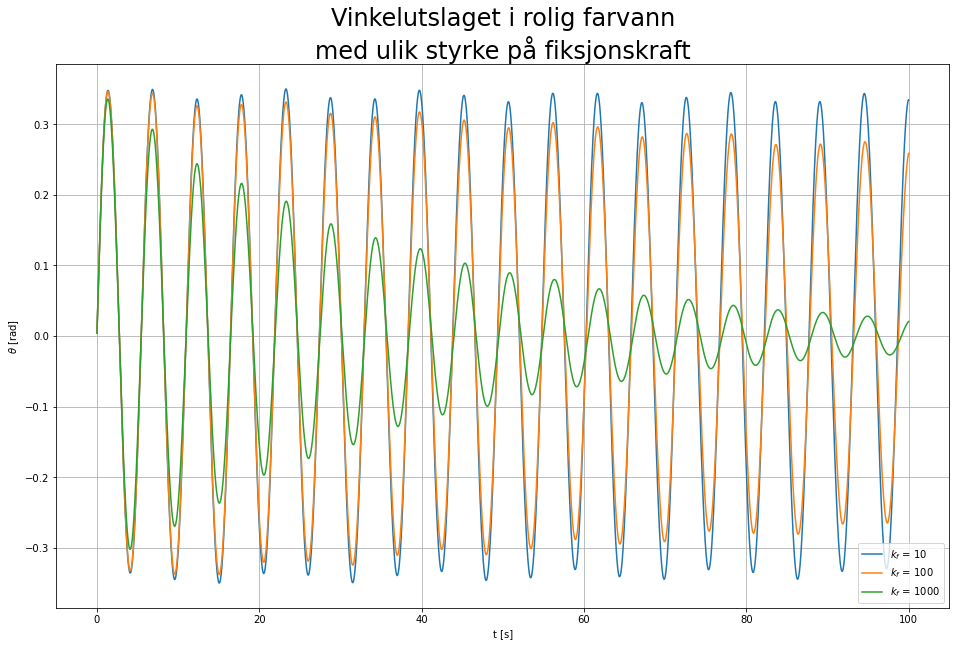

In [38]:
#Plotter løsningene funnet over i samme figur
plt.figure(figsize=(16, 10))
plt.plot(t_num_1, w_num_1[:,0])
plt.plot(t_num_2, w_num_2[:,0])
plt.plot(t_num_3, w_num_3[:,0])
plt.grid()

plt.legend(['$k_{f}$ = 10','$k_{f}$ = 100', '$k_{f}$ = 1000'])
plt.title("Vinkelutslaget i rolig farvann\nmed ulik styrke på fiksjonskraft", size = 24)
plt.xlabel('t [s]')
plt.ylabel(r'$\theta$ [rad]')

I plottet over ser vi at valgt verdi for $k_f$ har stor betydning for amplitudenes utvikling. Ettersom verdiene av $k_f$ øker vil amplitudene reduseres med tiden. Ved sammenligning av $k_f$ på 10 og 1000, ser man at mens en $k_f$ på 10 har liten reduksjon i amplitude, vil en $k_f$ på 1000 gi en drastisk reduksjon. Ved høy amplitude vil båten ha store svigninger, mens liten amplitude vil gi mindre svigninger. $k_f$ forteller oss om hvor raskt svigningene vil minke, og dermed hvor raskt båten vil falle til ro. 

La oss nå se på bølger og vind, i tillegg til friksjonskraften studert over. Fra og med nå vil vi ha en $k_f$ verdi på 100 kg/s. Bølgene og vinden gir opphav til en ny harmonisk kraft, $F_w = F_0cos(\omega_wt)$, som vil virke i x-retning. Denne kraften gir opphavet til dreiemomentet $\tau_w = F_wy_C$. Ettersom det ikke blir noen endring i kreftene som virker i y-retning, vil $\frac{dv_y}{dt}$ være som definert ved kun friksjon. 

$$\sum F_x = f + F_w = -k_fR\gamma\omega + F_0cos(\omega_wt) = ma_x = m\frac{dv_x}{dt} \implies \frac{dv_x}{dt} = \frac{-k_fR\gamma\omega + F_0cos(\omega_wt)}{m} $$

$$\sum \tau = \tau_B + \tau_f + \tau_w = - F_Bhsin(\theta) + f(y_C -R(cos(\gamma/2)-1)) + F_wy_C = - A\sigma_0ghsin(\theta) -k_fR\gamma\omega(y_C -R(cos(\gamma/2)-1)) + F_0cos(\omega_wt)y_C = I_C \frac{d\omega}{dt}$$

$$\implies \frac{d\omega}{dt} = \frac{- A\sigma_0ghsin(\theta) -k_fR\gamma\omega(y_C -R(cos(\gamma/2)-1)) + F_0cos(\omega_wt)y_C}{I_C}$$

Dermed får vi følgende funksjon: 

$$\vec{f}(\vec{w},t) = \frac{d\vec{w}}{dt} = [\omega \quad \frac{d\omega}{dt} \quad v_x \quad v_y \quad \frac{dv_x}{dt} \quad \frac{dv_y}{dt}]^T $$


$$ = [\omega \quad \frac{- A\sigma_0ghsin(\theta) -k_fR\gamma\omega(y_C -R(cos(\gamma/2)-1)) + F_0cos(\omega_wt)y_C}{I_C} \quad v_x \quad v_y \quad \frac{-k_fR\gamma\omega + F_0cos(\omega_wt)}{m} \quad \frac{-mg + A\sigma_0g}{m}]^T $$

$$ = [w[1] \quad \frac{- A\sigma_0ghsin(w[0]) -k_fR\gamma w[1](w[3] -R(cos(\gamma/2)-1)) + F_0cos(w[1]t)y_C}{I_C} \quad w[4] \quad w[5] \quad \frac{-k_fR\gamma w[1] + F_0cos(w[1]t)}{m} \quad \frac{-mg + A\sigma_0g}{m}]^T $$


Her vil $F_0 = 0.625mg$ , $\omega_0 = \sqrt{\frac{mgh}{I_C}}$ , $\omega_w = 0.93\omega_0$. Intitialbetingelsene vi bruker er: $\theta(0) = 0$ , $\omega(0) = 2^{\circ}/s$ 

Text(0, 0.5, '$\\theta$ [rad]')

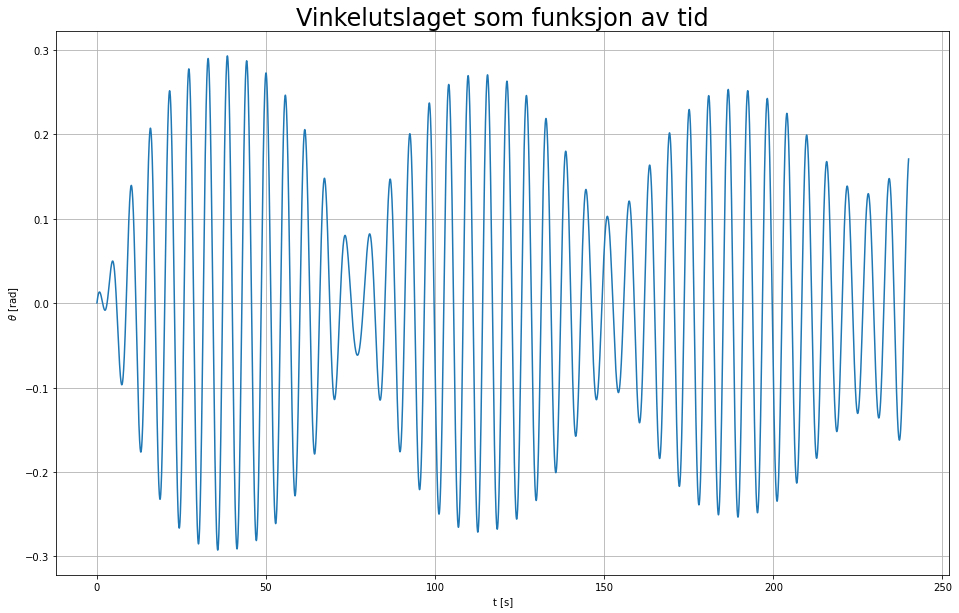

In [39]:
# Oppgitte verdier
F_0 = 0.625*m*g
omega0 = np.sqrt((m*g*h)/I_C)
omega_w = 0.93*omega0
k_f = 100

#initilabetingelser
w0_harmonic = np.array([0, (2*np.pi)/180, 0, y_C0 , 0 , 0])

#Funksjonen som definert over
def diff_func_harmonic(t, w, k_f): 
    gamma = gamma_funksjon(beta, w[0], w[3])
    A = areal_fortrengt_vann(gamma)
    
    F_G = - m*g
    F_B  = A*sigma_0*g
    f = -k_f*R*gamma*w[1]
    F_W = F_0*np.cos(omega_w*t)
    
    return np.array([w[1], (-F_B*h*np.sin(w[0])+f*(w[3]-R*(np.cos(gamma/2)-1))+F_W*w[3])/I_C,
                    w[4], w[5], (F_W + f)/m, (F_G + F_B)/m])

#Finner løsningen til funksjonen
t_harmonic, w_harmonic = ode_solver_friksjon(diff_func_harmonic, 0, 240, w0_harmonic, 0.01, RK4_friksjon, k_f)

# Plotter funksjonen
plt.figure(figsize=(16, 10))
plt.plot(t_harmonic, w_harmonic[:,0])
plt.grid()
plt.title("Vinkelutslaget som funksjon av tid", size = 24)
plt.xlabel('t [s]')
plt.ylabel(r'$\theta$ [rad]')

I dette scenarioet, med vind, bølger og friksjon, har vi to harmoniske funksjoner. Den første harmoniske funksjonen beskriver båtens bevegelse grunnet dens vinkelhastighet, mens den andre kommer av bølgene og vinden. Begge disse harmoniske funksjonene vil påvirke skipets vinkelutslag, og etterhvert også hverandre. Ettersom frekvensene til de to harmoniske funksjonene er ulike vil svevning oppstå. Det største vinkelutslaget vil finne sted når begge de harmoniske funksjonene har sitt maksimum, og tilsvarende for minimum. Bølgene (og vinden) og skipet vil påvirke hverandre, ettersom båten vil sende deler av innsendte bølger tilbake. Detter fenomenet kan vi se på amplitudene. Vi ser at svevningsamplitudene, den absolutte amplituden, vil avta med tiden. Dessuten kan vi legge merke til at amplitudene til svingningene mellom svevningsamplitudene gradvis vil øke i absoluttverdi. Dermed kan vi konkludere med at amplitudene, maksutsving, gradvis vil jevne seg ut.


Fjerdeordens Runge Kutta, RK4, er en numerisk metode for å løse differensiallikninger. Med ganske liten feil gir den gode estimater. Men selv om feilen er liten, så er feilestimatet vanskelig å beregne med metoden. RK4 klarer heller ikke å løse alle typer differensiallikninger. Typisk så er stive differensiallikninger vanskelig å beregne med Runga Kutta, og det gjelder også for RK4. I tillegg har RK4 lengre kjøretid enn andre metoder med tilsvarende resultater.  

Bogacki-Shampine er en tredje ordens Runge Kutta metode som også kan løse stive diff.likninger. Den gir mindre presis løsning enn RK4, men har til gjengjeld kortere kjøretid. Bogacki-Shampine regnes som en god metode å bruke når man kun trenger grovere anslag. Metoden benytter seg av FSAL - First Same As Last - som tar det siste steget i forrige iterasjon for å bruke det som første steg. I tillegg kan man bruke Bogacki Shampine med adaptiv steglengde. Da tar metoden hensyn til den lokale feilen og beregner en ny steglengde for å sikre A-stabilitet. Det er det som gjør at denne metoden også kan brukes på, ihvertfall noen, stive differensiallikninger.

I dette prosjeketet har vi ikke sett på noen stive differensiallikninger. Utregningene er også relativt raske og kjøretid har ikke vært nødvendig å ta hensyn til, noe som var klart fra start. Vi har heller ikke vært interessert i å få den lokale eller globale feilen fra hver kjøring av metodene, men har heller sjekket metodene opp mot den analytiske løsningen. Ingen av de andre metodene later til å gi en tydelig fordel over RK4-metoden som vi har brukt. Vi ønsker likevel å sammenlikne RK4 opp mot Bogacki-Shampine for å undersøke fordelene og ulempene ved de forskjellige metodene.

Vi skal nå implementere Bogacki Shampine og sammenlikne den med RK4 som vi har brukt tidligere. For å gjøre dette skal vi, for begge metodene, se på hvordan enkelte verdier for av $\omega_{w}$ kan føre til kantring, selv ved lav initialverdi for $\omega$.

In [69]:
def bogshamp(t0,tend,y0,f,h0,k_f = 100,tol=1.0e-6):
    P=0.9  # Variabel for beregning av ny steglengde
    h=h0   # Første steg
    k=0    # Antall steg 
    fevals=0 # Antall evalueringer
    rejects=0 # Antall forkastede skritt
    m=y0.shape[0] 
    Y=y0[:,np.newaxis]
    T=np.array([t0])
    F1 = f(T[k],Y[:,k],k_f) # Første evaluering
    fevals+=1
    while tend-T[k]>0:
        h=min(h,tend-T[k]) #Justerer siste steglengde
        # Evalueringer
        F2 = f(T[k]+0.5*h,Y[:,k]+0.5*h*F1,k_f)
        F3 = f(T[k]+0.75*h, Y[:,k]+0.75*h*F2,k_f)
        y1=Y[:,k] + 1./9.*h*(2.*F1 + 3.*F2 + 4.*F3)
        F4 = f(T[k]+h,y1,k_f)
        fevals+=3
        #Brukes til å beregne error
        y1h = Y[:,k] + h/24.*(7*F1 + 6*F2 + 8*F3 + 3*F4) 
        normest = np.linalg.norm(y1h-y1)
        if normest < tol:
            if abs(y1[0]) > (np.pi - gamma_funksjon(beta, y1[0], y1[3])) / 2:  #sjekker om kriteriet for kantring er oppfylt
                y1[0] = np.sign(Y[0][k-1])*np.pi/2
                y1[1:,] = 0
                Y = np.append(Y, y1[:,np.newaxis], axis=1)
                T=np.append(T,T[k]+h)
            else:
                T=np.append(T,T[k]+h)
                Y = np.append(Y, y1[:,np.newaxis], axis=1)
                
            F1=F4
            k+=1
        else:
            rejects+=1
        h = P*h*(tol/normest)**(1./3.) #Tilpasser steglengde
    stats = {'steps' : k, 'fevals' : fevals, 'rejects' : rejects}
    print(stats)
    return T, Y

w0_harmonic = np.array([0, (2*np.pi)/180, 0, y_C0 , 0 , 0])

omega0 = np.sqrt((m*g*h)/I_C)
omega_w = 0.93*omega0

dp_tidbog, dp_thetabog = bogshamp(0, 150, w0_harmonic, diff_func_harmonic, 0.01)
dp_tidRK4, dp_thetaRK4 = ode_solver_friksjon(diff_func_harmonic, 0, 150,w0_harmonic, 0.01, RK4,k_f)

omega0 = np.sqrt((m*g*h)/I_C)
omega_w = 0.99*omega0
dp_tidbog_2, dp_thetabog_2 = bogshamp(0, 150, w0_harmonic, diff_func_harmonic, 0.01)
dp_tidRK4_2, dp_thetaRK4_2 = ode_solver_friksjon(diff_func_harmonic, 0, 150,w0_harmonic , 0.01, RK4,k_f)


{'steps': 8679, 'fevals': 26038, 'rejects': 0}
{'steps': 16199, 'fevals': 48640, 'rejects': 14}


In [70]:
print("Steg i RK4 er: ")
print({'steps' : (150)/0.01, 'fevals' : (150)/0.01 * 4, 'rejects' : 0}) # Finner hvor mange steg vi gjennomfører i RK4

Steg i RK4 er: 
{'steps': 15000.0, 'fevals': 60000.0, 'rejects': 0}


Bogacki Shampine vil for $\omega_w = 0.93 \omega_0$ ha både færre steg og færre evalueringer enn RK4. I kontrast til tilfellet med $\omega_w = 0.99 \omega_0$, her vil Bogacki Shampine ha flere steg enn RK4, men fremdeles færre evalueringer. Dette kommer av at RK4 gjør 4 evalueringer for hvert steg, mot Bogacki Shampine sine 3 evalueringer per steg. Dette vil medføre Bogacki Shampine vil bruke mindre tid enn RK4. 

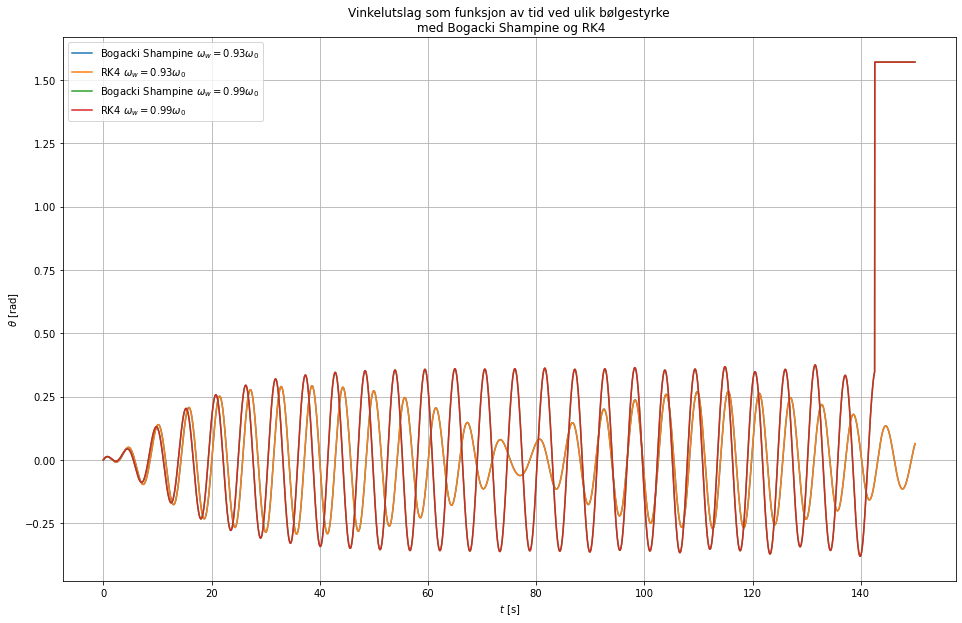

In [73]:
plt.figure(figsize=(16, 10))
plt.plot(dp_tidbog, dp_thetabog[0,:], dp_tidRK4, dp_thetaRK4[:,0])
plt.plot(dp_tidbog_2, dp_thetabog_2[0,:], dp_tidRK4_2, dp_thetaRK4_2[:,0])
plt.xlabel('$t$ [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.title("Vinkelutslag som funksjon av tid ved ulik bølgestyrke\n med Bogacki Shampine og RK4")
plt.legend([r'Bogacki Shampine $\omega_w = 0.93\omega_0$',r'RK4 $\omega_w = 0.93\omega_0$',r'Bogacki Shampine $\omega_w = 0.99\omega_0$',r'RK4 $\omega_w = 0.99\omega_0$'])
plt.grid()
plt.show()

Plotter viser grafene til både Bogacki Shampine og RK4 med bølger med ulik frekvens. Begge metodene er brukt til å plotte skipets vinkelutslag med to forskjellige bølgefrekvenser. I plottet er kun to grafer synlige, en for hver av bølgefrekvensene, som vil si at grafene til de to metode ligger oppå hverandre. På øyemål er det ikke mulig å se forskjell på de to grafene. Dette vil si at differansen mellom metodene her er av en mye mindre størrelsesorden enn plottet fremstiller.

Som nevnt tidliger vil Bogacki Shampine ha kortere kjøretid enn RK4. I dette prosjektet har ikke kjøretid vært et problem, noe vi visste fra start. Vi har heller ikke sett på stiv differensiallikninger, som er en av de store fordelene ved Bogacki Shampine. I tillegg gir metodene tilnærmet like resultater i våre beregninger. 
For våre formål i dette prosjektet kunne nok dermed Bogacki Shampine vært like hensiktsmessig å bruke som RK4. I praksis utgjør valget mellom de to metodene liten forskjell for prosjektet.

__Konklusjon__

I dette prosjektet har vi undersøkt ulike elementer som kan ha bidratt til Vasaskipet sin kantring. Et skip vil kantre når vinkelutslaget blir for stort. Et stort vinkelutslag kan forårsakes av stor startvinkelhastighet, mye bølger og vind og tung (usikkret) last. Vi har sett at for stor startvinkelhastighet fører til rask kantring. Vi fant at startvinkelhastighet større enn 0.4317 radianer/sekund fører til kantring, med startvinkel lik 0. For bølger og vind tar det derimot betydelig lenger tid før kantring og det er kun for enkelte verdier av $\omega_w$ at kantring oppstår. Vi fant at tung usikret last på skip med gjerde fører til kantring. Hvor raskt kantringen skjer avhenger av massen til lasten og dens startposisjon i forhold til metasenteret. Tyngden til lasten spiller en signifikant rolle ettersom dette gir opphav til et stort dreiemoment. 

Vasaskipet sank fordi det var topptungt. Tunge materialer og tung last i toppen av skroget og på øverste dekk førte til ustabilitet. Vi har sett at denne fordelingen av masse gir stort dreiemoment, som fører til at båten til slutt kantrer. Da det i tillegg kom et lite vindpust i seilene på båten, klarte ikke Vasaskipet lenger å holde seg over vann. Altså kan vi konkludere med at Vasaskipet sank hovedsakelig på grunn av dårlig vektdistribusjon, med bølger og vind som den utløsende faktoren. 

__Bibliografi :__

Holm, H. (2011). Oppdrift og stabilitet. I Havromsteknologier (ss. 2-3). NTNTU - Institutt for marinteknikk.

Wisting, T. (2020, januar 10). Vasa (skip). Hentet fra Store Norske Leksikon: https://snl.no/Vasa_-_skip
